# 1. Regularised Linear Regression

### City and Highway CO2 Prediction Experimentations
+ (a) ElasticNet
+ (b) Ridge
+ (c) Lasso

In [1]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
plt.style.use('ggplot')
import seaborn as sns
import pandas_profiling as pp
#pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import mpl_toolkits
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import tensorflow as tf
from keras import models, layers
from tensorflow import keras
from pylab import rcParams

from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Modeling Libraries
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from subprocess import check_output

%matplotlib inline

%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 16, 10
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

import os
# Hide Warnings
import warnings
warnings.filterwarnings('ignore')

# (1) City Route CO2 Prediction

### Data Loading & Partition 

In [2]:
df = pd.read_csv('CO2_Cleaned.csv')

df = df.drop(['Hway_Mileage', 'Min_Wght'], axis = 1)

target_col = "CO2"

X = df.loc[:, df.columns != target_col]
Y = df.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_SEED)

## (a). Elastic Net Regression

In [3]:
# Model with ElasticNet Cross Validation
eCV_Model = ElasticNetCV(l1_ratio = [1, .1, .5, .7, .9, .95, .99, 1], eps = 1e-3, n_alphas = 100, 
                         fit_intercept = True, normalize = True, precompute = 'auto', max_iter = 2000, 
                         tol = 0.0001, cv = 10, copy_X = True, verbose = 0, n_jobs = -1, 
                         positive = False, random_state = 0)
               
eCV_Model.fit (X_train, y_train)

print ('Optimal Alpha:% .8f'% eCV_Model.alpha_)
print ('Optimal L1_Ratio:% .3f'% eCV_Model.l1_ratio_)
print ('No. of Iterations:% d'% eCV_Model.n_iter_)

Optimal Alpha: 0.00000187
Optimal L1_Ratio: 1.000
No. of Iterations: 212


### Elastic Net Regression Coefficient Estimates

In [4]:
EN_Coeff = pd.DataFrame() 
EN_Coeff["Columns"] = X_train.columns 
EN_Coeff['Coefficient Estimate'] = pd.Series(eCV_Model.coef_) 
  
print(EN_Coeff)

        Columns  Coefficient Estimate
0        Max_HP             -0.003704
1  City_Mileage             -0.019602
2   Mix_Mileage              0.906274
3          CO_1              0.000000
4           NOC              0.032106
5         HCNOX             -0.032095
6          PTCL              0.000547
7      Max_Wght              0.112116
8       Gas_ES               0.000000
9       Gas_GO               0.000000


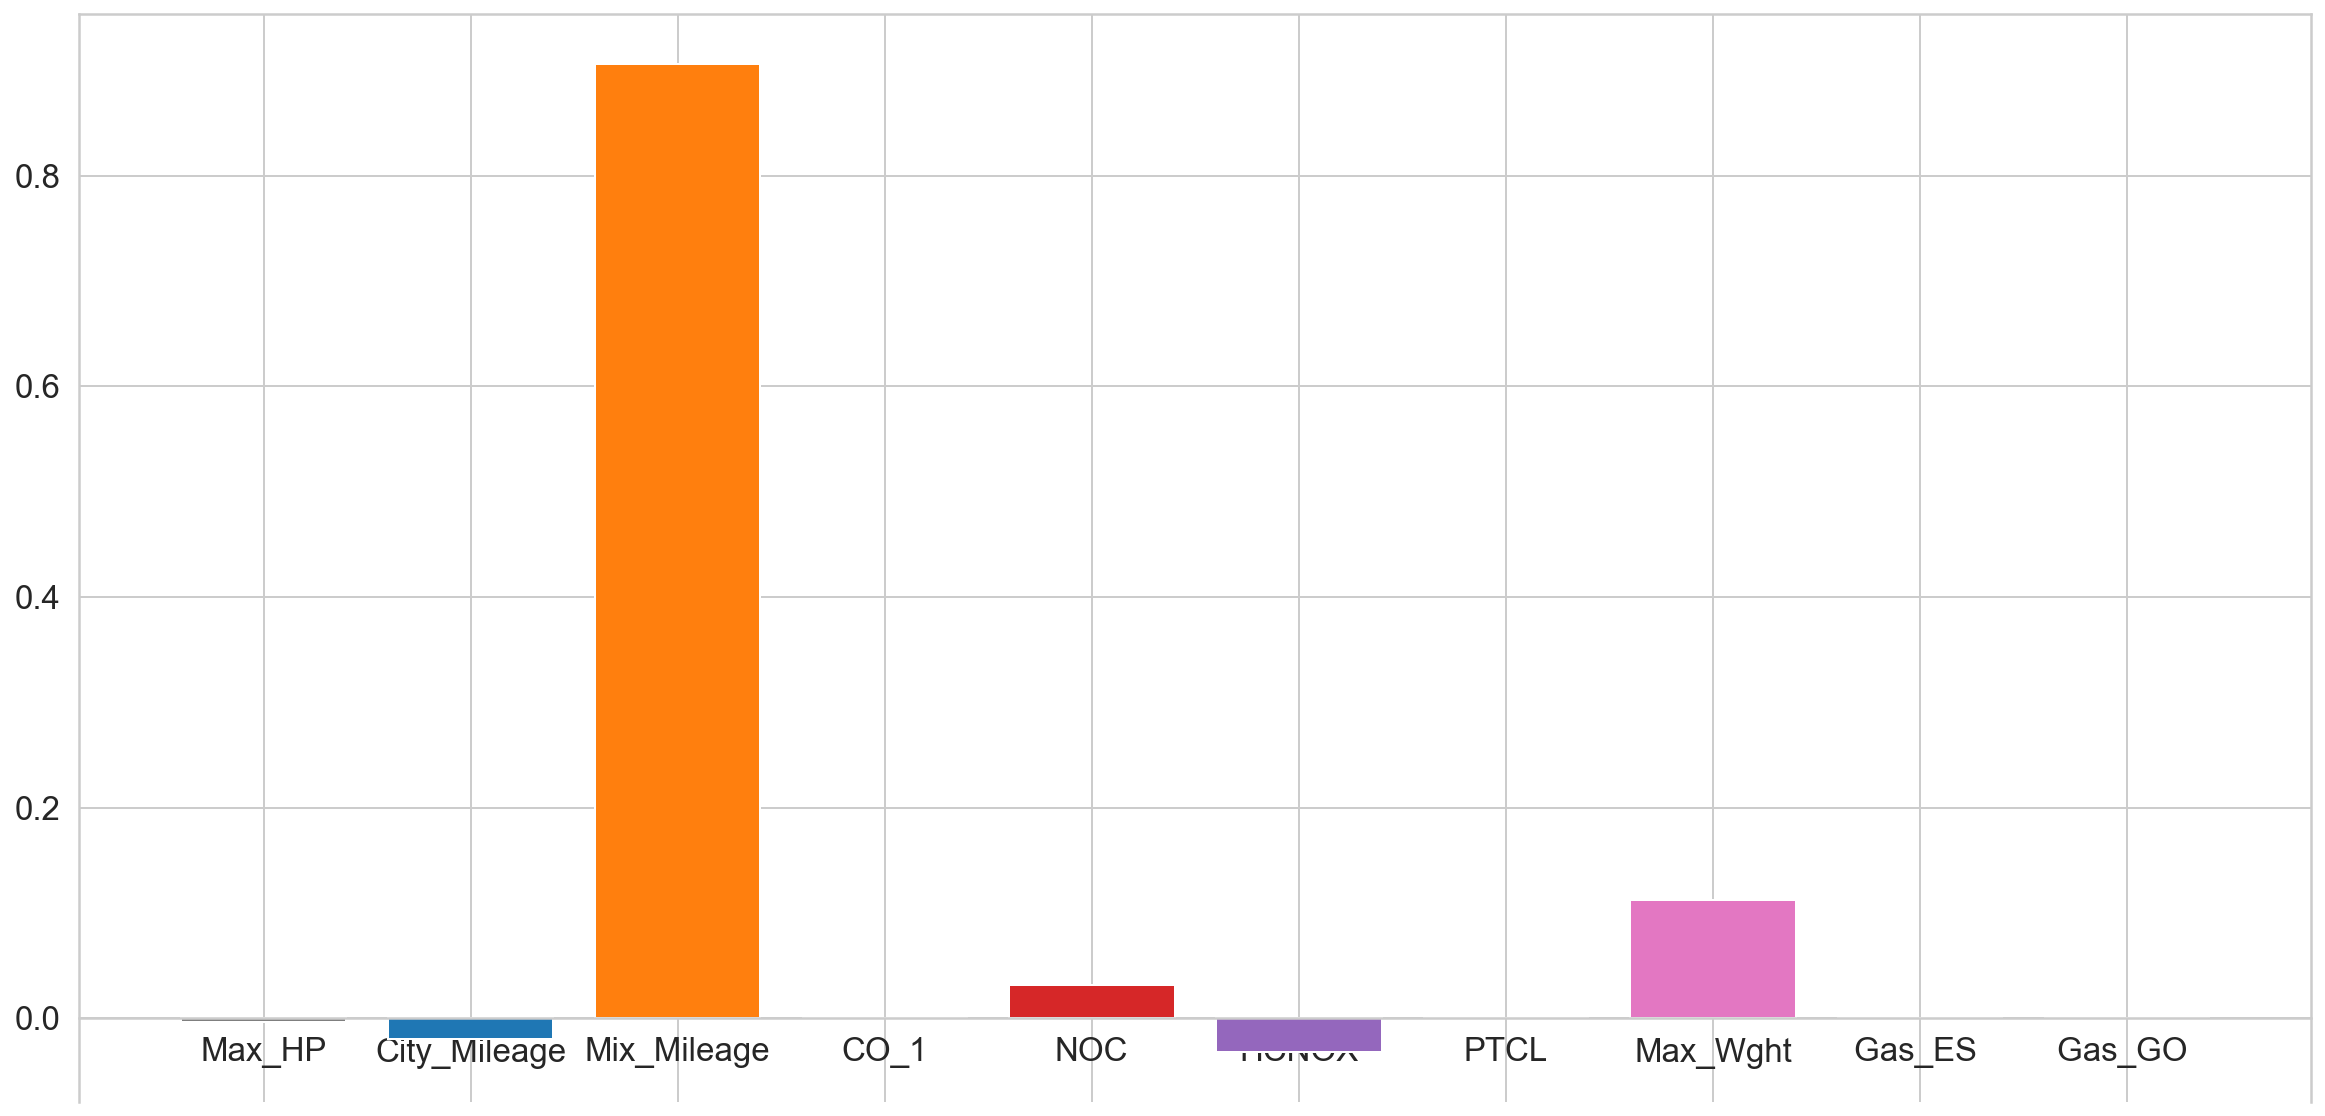

In [5]:
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(EN_Coeff["Columns"],  
EN_Coeff['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 

### Elastic Net Regression Model Evaluation

#### Train Data Evaluation

In [6]:
y_train_pred = eCV_Model.predict(X_train)

Root Squared Value

In [7]:
print('Train R2: ', r2_score(y_train_pred, y_train))

Train R2:  0.9904335311308098


Mean Squared Value

In [8]:
MSE_Elastic = np.mean((y_train_pred - y_train)**2) 
print('Elastic Regression MSE:',MSE_Elastic)

Elastic Regression MSE: 0.000534331101383405


Root Mean Sqaured Error

In [9]:
train_error_elastic = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
print('Train RMSE:', train_error_elastic)

Train RMSE: 0.02311560298550315


#### Test Data Evaluations

In [10]:
y_pred = eCV_Model.predict(X_test)

Test Root Squared Value

In [11]:
print('Test R2: ', r2_score(y_pred, y_test))

Test R2:  0.9897830186377579


Test Mean Squared Error

In [12]:
MSE_Elastic = np.mean((y_pred - y_test)**2) 
print('Test MSE:',MSE_Elastic)

Test MSE: 0.0005613894692625619


Test Root Mean Sqaured Error

In [13]:
test_error_elastic = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Test RMSE:', test_error_elastic)

Test RMSE: 0.023693658840765023


#### Test and Train Elastic Net Model Visualization

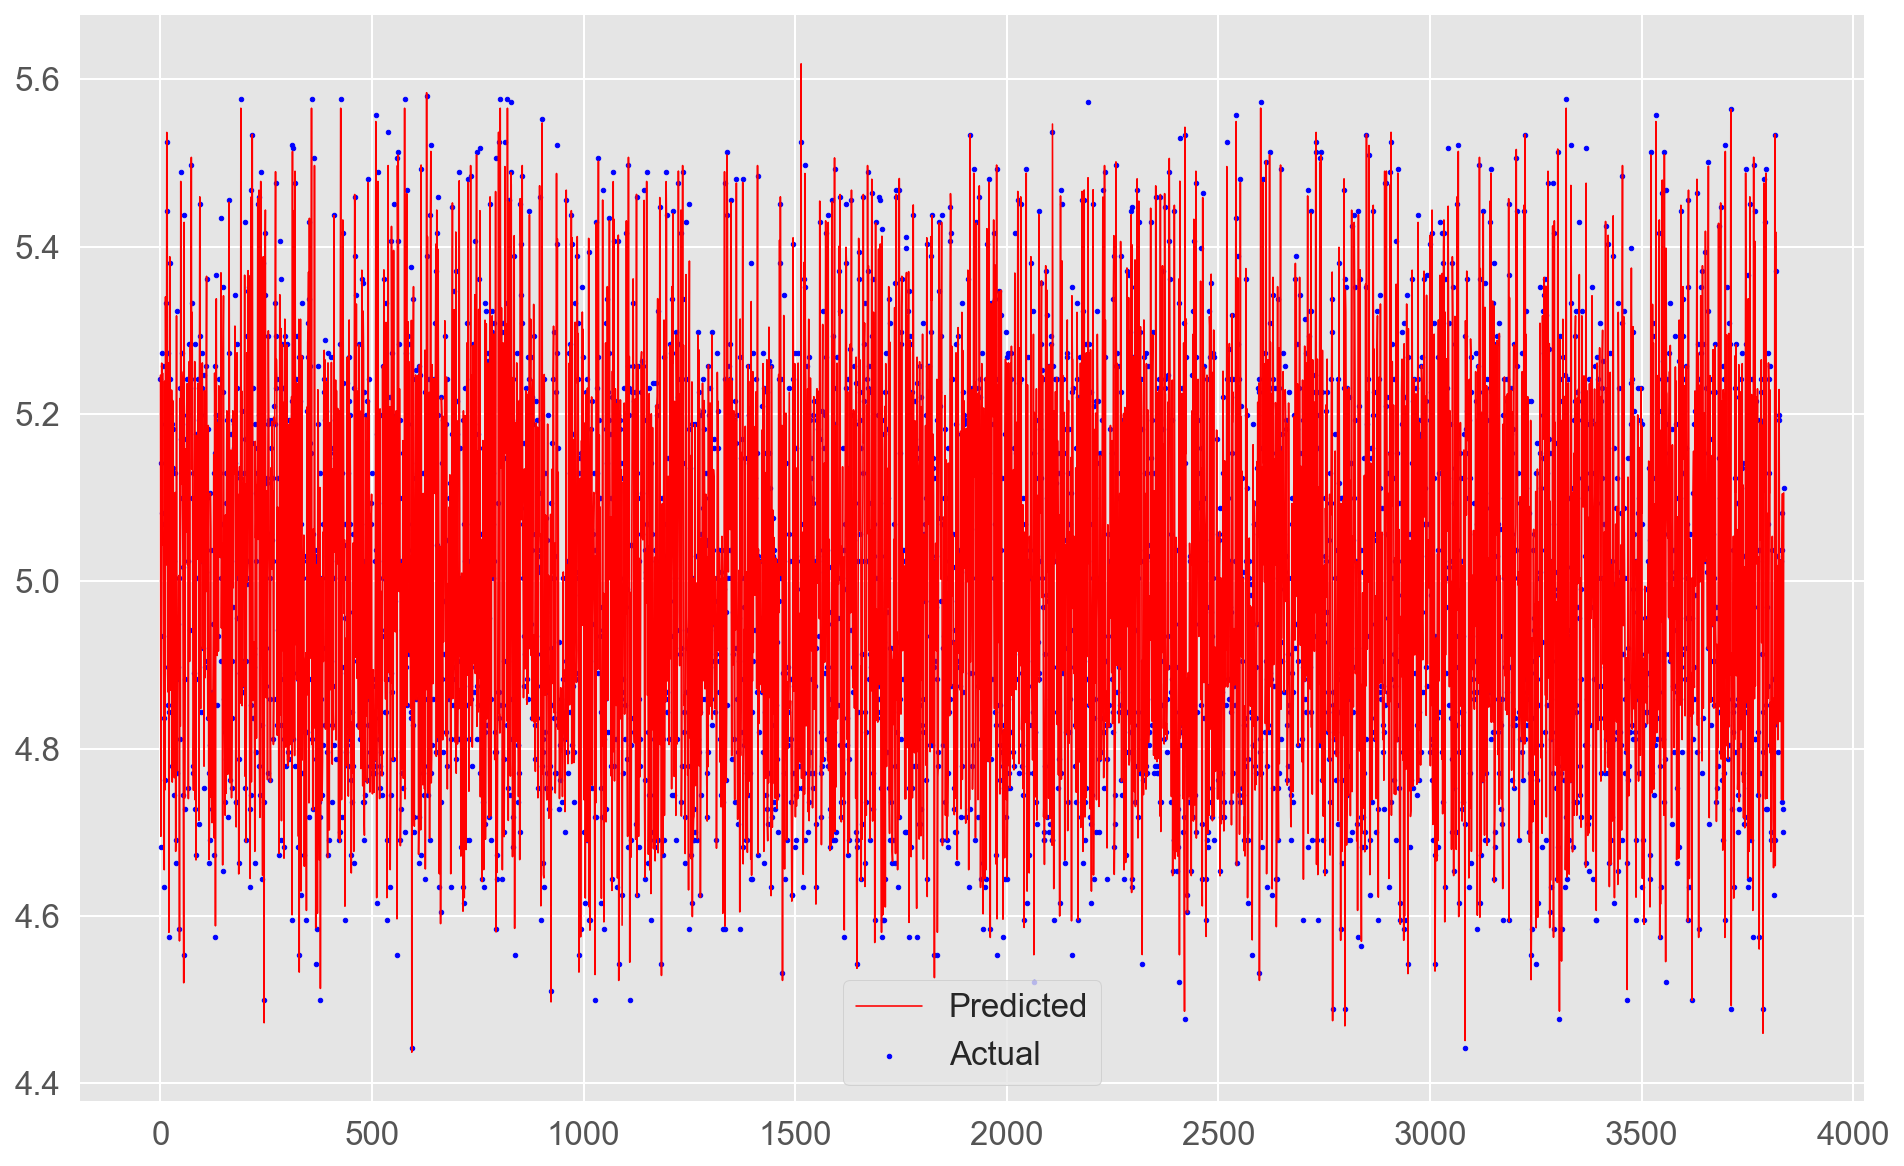

In [14]:
test_viz = range(len(X_test))
plt.scatter(test_viz , y_test, s=5, color="blue", label="Actual")
plt.plot(test_viz , y_pred, lw=0.8, color="red", label="Predicted")
plt.legend()
plt.show()

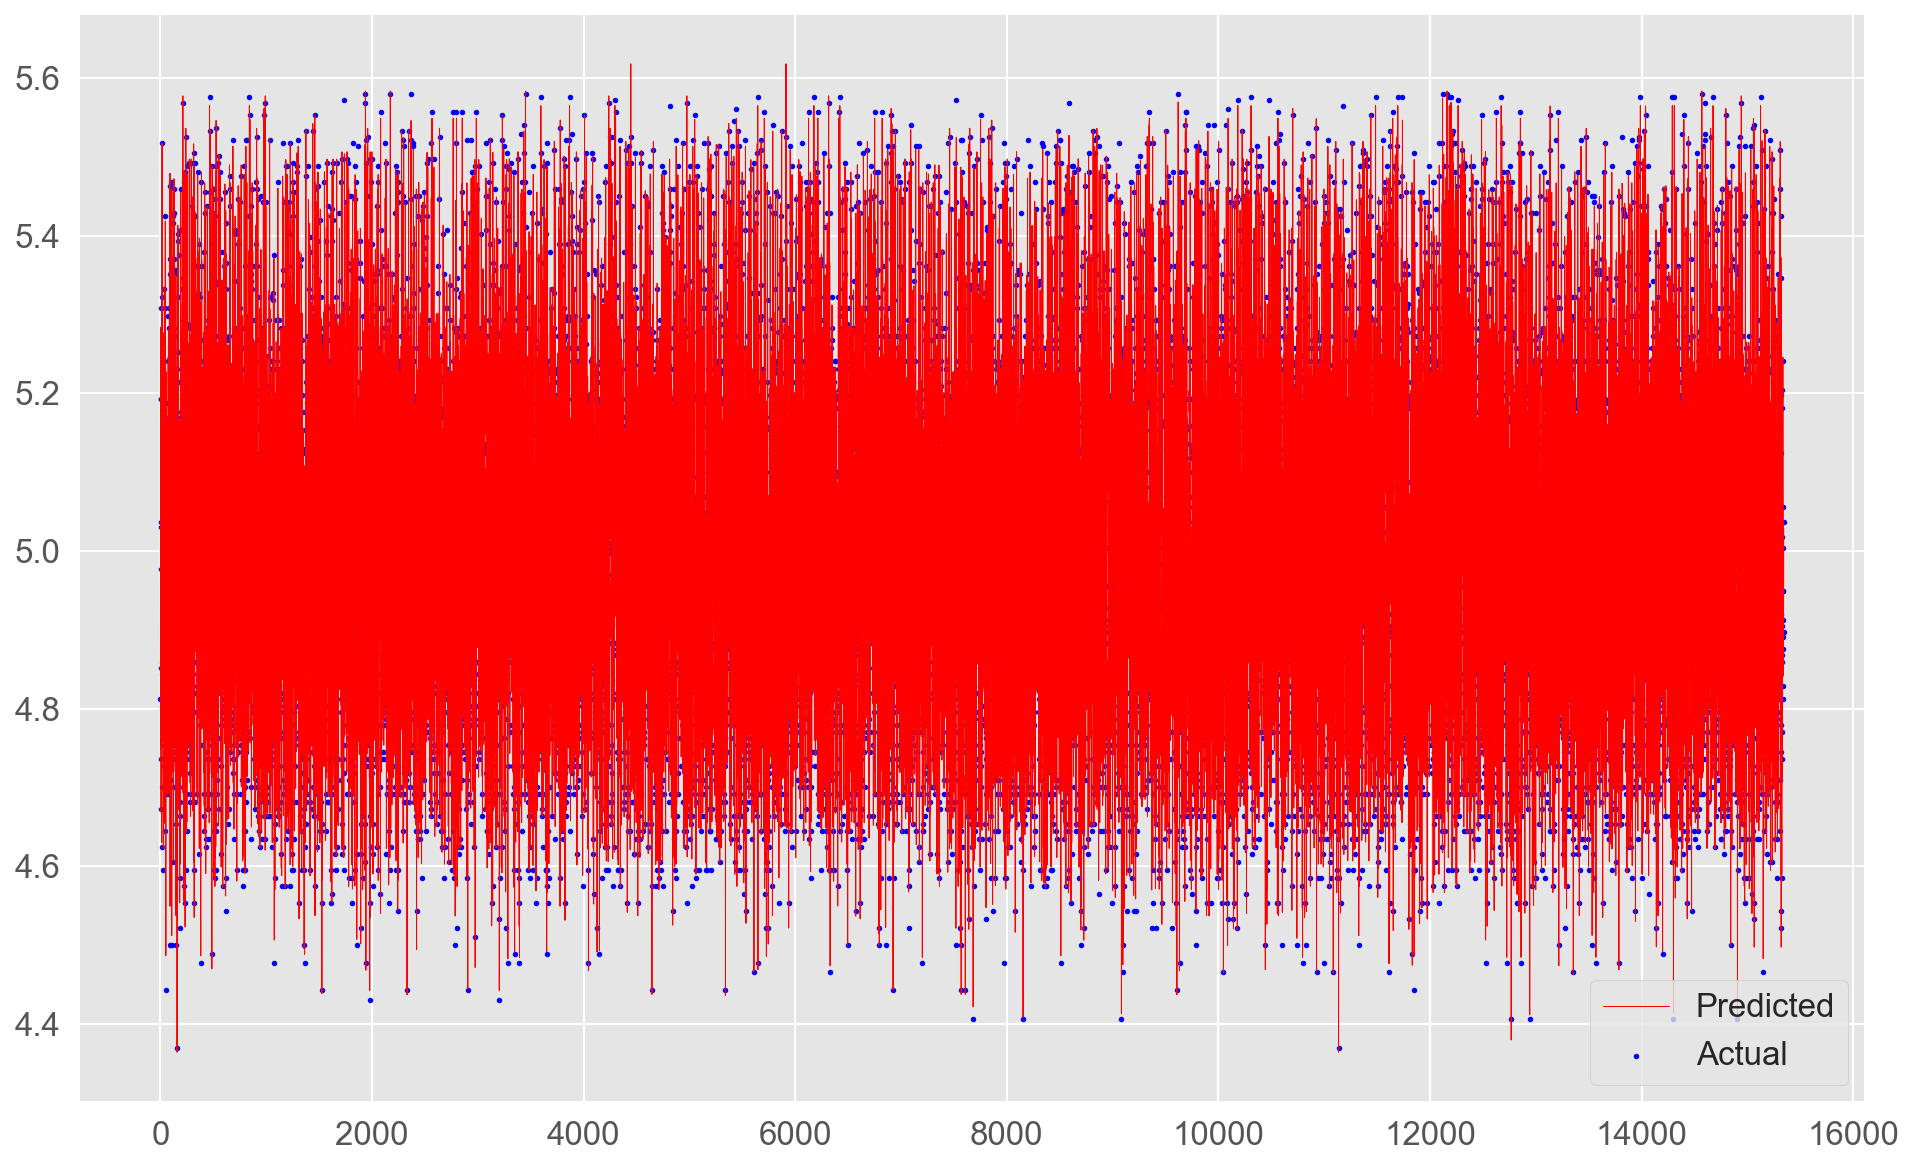

In [15]:
train_viz  = range(len(X_train))
plt.scatter(train_viz , y_train, s=5, color="blue", label="Actual")
plt.plot(train_viz , y_train_pred, lw=0.5, color="red", label="Predicted")
plt.legend()
plt.show()

## (b). Ridge Regression

In [16]:
# List of Alphas to Tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# Cross Validation
folds = 5

ridgeCV_Model = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridgeCV_Model.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [17]:
# Checking the Value of Optimum Number of Parameters

print(ridgeCV_Model.best_params_)
print(ridgeCV_Model.best_score_)

{'alpha': 0.1}
-0.01744608227392808


In [18]:
CV_Results = pd.DataFrame(ridgeCV_Model.cv_results_)
CV_Results= CV_Results[CV_Results['param_alpha']<=1000]
CV_Results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.003804      0.001768         0.001714        0.000137      0.0001   
1        0.003305      0.000439         0.001916        0.000324       0.001   
2        0.003054      0.000342         0.001535        0.000079        0.01   
3        0.002769      0.000070         0.001500        0.000020        0.05   
4        0.002798      0.000039         0.001492        0.000017         0.1   
5        0.002887      0.000148         0.001659        0.000323         0.2   
6        0.003601      0.000311         0.002009        0.000259         0.3   
7        0.003752      0.000864         0.002297        0.000499         0.4   
8        0.003336      0.000677         0.001581        0.000061         0.5   
9        0.003380      0.000685         0.001674        0.000177         0.6   
10       0.002739      0.000133         0.001458        0.000022         0.7   
11       0.002684      0.000047         0.001457        0.000013         0.8   
12       0.002783      0.000070         0.001471        0.000021         0.9   
13       0.002731      0.000012         0.001464        0.000012           1   
14       0.002759      0.000031         0.001492        0.000040           2   
15       0.002754      0.000032         0.001467        0.000016           3   
16       0.002741      0.000030         0.001469        0.000031           4   
17       0.002725      0.000024         0.001444        0.000009           5   
18       0.002726      0.000012         0.001472        0.000028           6   
19       0.002882      0.000276         0.001465        0.000019           7   
20       0.002757      0.000042         0.001452        0.000017           8   
21       0.002753      0.000020         0.001468        0.000023           9   
22       0.002743      0.000030         0.001486        0.000038          10   
23       0.002788      0.000076         0.001457        0.000026          20   
24       0.002757      0.000046         0.001442        0.000009          50   
25       0.002731      0.000029         0.001441        0.000014         100   
26       0.002737      0.000037         0.001444        0.000003         500   
27       0.002784      0.000038         0.001470        0.000025        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.017313          -0.017786   
1    {'alpha': 0.001}          -0.017313          -0.017786   
2     {'alpha': 0.01}          -0.017313          -0.017786   
3     {'alpha': 0.05}          -0.017313          -0.017787   
4      {'alpha': 0.1}          -0.017314          -0.017788   
5      {'alpha': 0.2}          -0.017318          -0.017794   
6      {'alpha': 0.3}          -0.017324          -0.017802   
7      {'alpha': 0.4}          -0.017333          -0.017810   
8      {'alpha': 0.5}          -0.017344          -0.017822   
9      {'alpha': 0.6}          -0.017355          -0.017835   
10     {'alpha': 0.7}          -0.017368          -0.017849   
11     {'alpha': 0.8}          -0.017382          -0.017865   
12     {'alpha': 0.9}          -0.017397          -0.017881   
13     {'alpha': 1.0}          -0.017414          -0.017899   
14     {'alpha': 2.0}          -0.017623          -0.018120   
15     {'alpha': 3.0}          -0.017922          -0.018402   
16     {'alpha': 4.0}          -0.018240          -0.018705   
17     {'alpha': 5.0}          -0.018560          -0.019010   
18     {'alpha': 6.0}          -0.018869          -0.019318   
19     {'alpha': 7.0}          -0.019153          -0.019605   
20     {'alpha': 8.0}          -0.019426          -0.019873   
21     {'alpha': 9.0}          -0.019685          -0.020125   
22    {'alpha': 10.0}          -0.019927          -0.020359   
23      {'alpha': 20}          -0.021614          -0.022024   
24      {'alpha': 50}          -0.024063          -0.024578   
25     {'alpha': 100}          -0.027220     

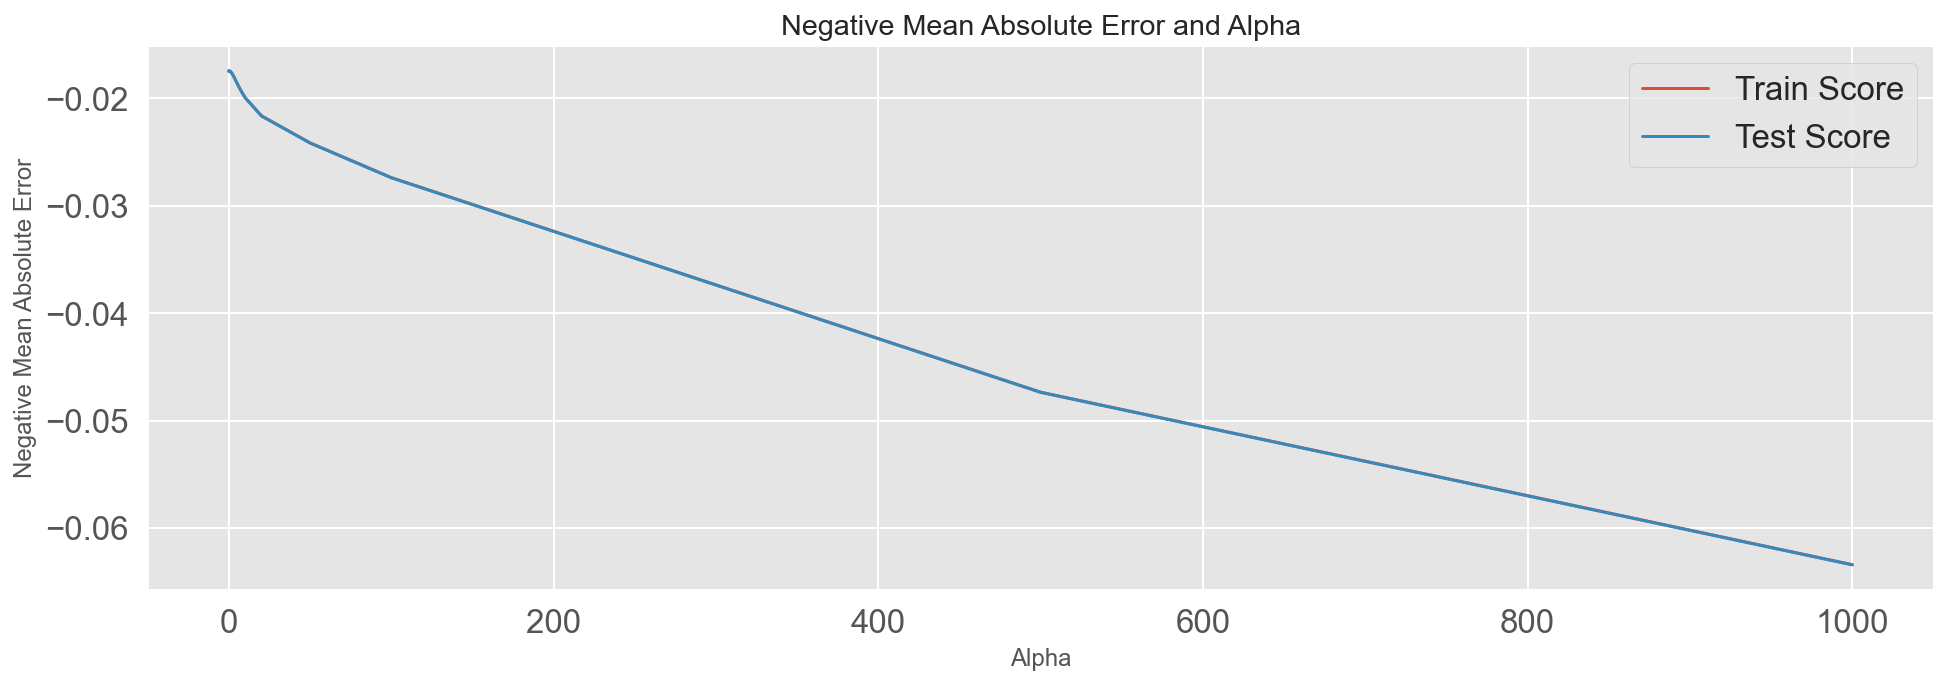

In [19]:
# Plotting Mean Test & Train Scores with Alpha 
CV_Results['param_alpha'] = CV_Results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# Plotting
plt.plot(CV_Results['param_alpha'], CV_Results['mean_train_score'])
plt.plot(CV_Results['param_alpha'], CV_Results['mean_test_score'])
plt.xlabel('Alpha')

plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['Train Score', 'Test Score'], loc='upper right')
plt.show()

In [20]:
# Setting Alpha to the bestparam score Obtained from optimal lambda (0.0001)

alpha = 0.0001
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-3.63412459e-03, -9.58876226e-02,  1.00416268e+00,  6.48681376e-04,
        3.24227687e-02, -3.53146674e-02,  6.97504519e-04,  9.53762835e-02,
        0.00000000e+00,  0.00000000e+00])

### Ridge Regression Coefficient Estimates

In [21]:
RD_Coeff = pd.DataFrame() 
RD_Coeff["Feature"] = X_train.columns 
RD_Coeff['Coefficient'] = pd.Series(ridge.coef_) 
  
print(RD_Coeff)

        Feature  Coefficient
0        Max_HP    -0.003634
1  City_Mileage    -0.095888
2   Mix_Mileage     1.004163
3          CO_1     0.000649
4           NOC     0.032423
5         HCNOX    -0.035315
6          PTCL     0.000698
7      Max_Wght     0.095376
8       Gas_ES      0.000000
9       Gas_GO      0.000000


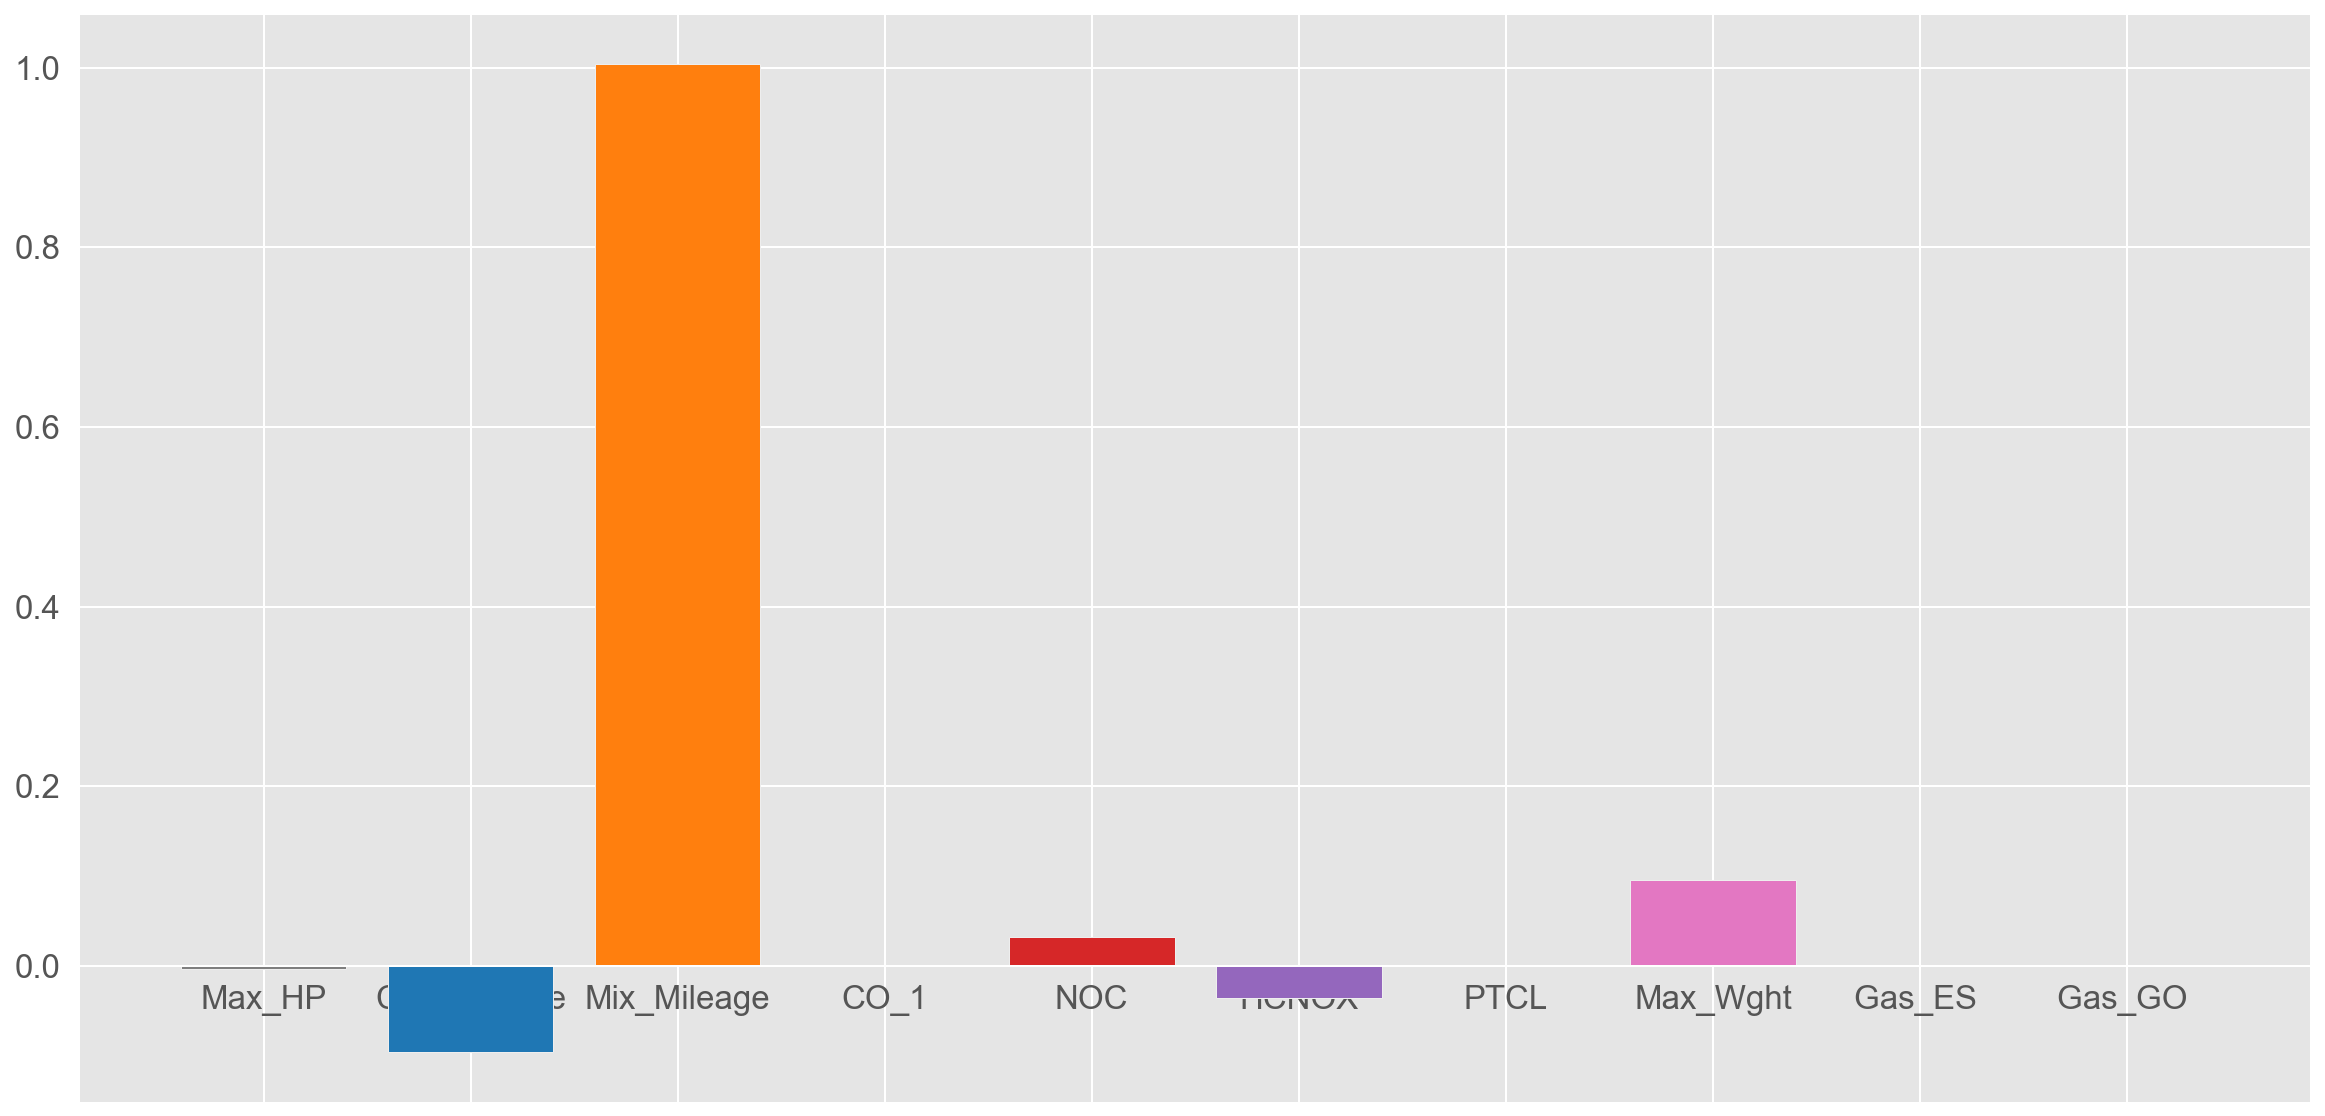

In [22]:
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(RD_Coeff["Feature"],  
RD_Coeff['Coefficient'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show()

### Ridge Regression Model Evaluation

### Train Data Evaluations

In [23]:
y_train_pred = ridge.predict(X_train)

Train Data R-Squared Value

In [24]:
print('Train R2:',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

Train R2: 0.9907403755718087


Train Mean Squared Error

In [25]:
MSE_Ridge = np.mean((y_train_pred - y_train)**2) 
print('Ridge Regression MSE:',MSE_Ridge)

Ridge Regression MSE: 0.0005234693614599994


Train Root Mean Square Error

In [26]:
train_error_ridge = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
print('Train RMSE:', train_error_ridge)

Train RMSE: 0.022879452822565313


### Test Data Evaluations

In [27]:
y_test_pred = ridge.predict(X_test)

Test Data R-Squared Value

In [28]:
print('Train R2:',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

Train R2: 0.9901270544218072


Test Mean Squared Error

In [29]:
MSE_Ridge = np.mean((y_test_pred - y_test)**2) 
print('Ridge Regression MSE:',MSE_Ridge)

Ridge Regression MSE: 0.0005484060110046399


Test Root Mean Square Error

In [30]:
test_error_ridge = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Test RMSE:', test_error_ridge)

Test RMSE: 0.023418070181051184


### Test and Train Ridge Model Visualization

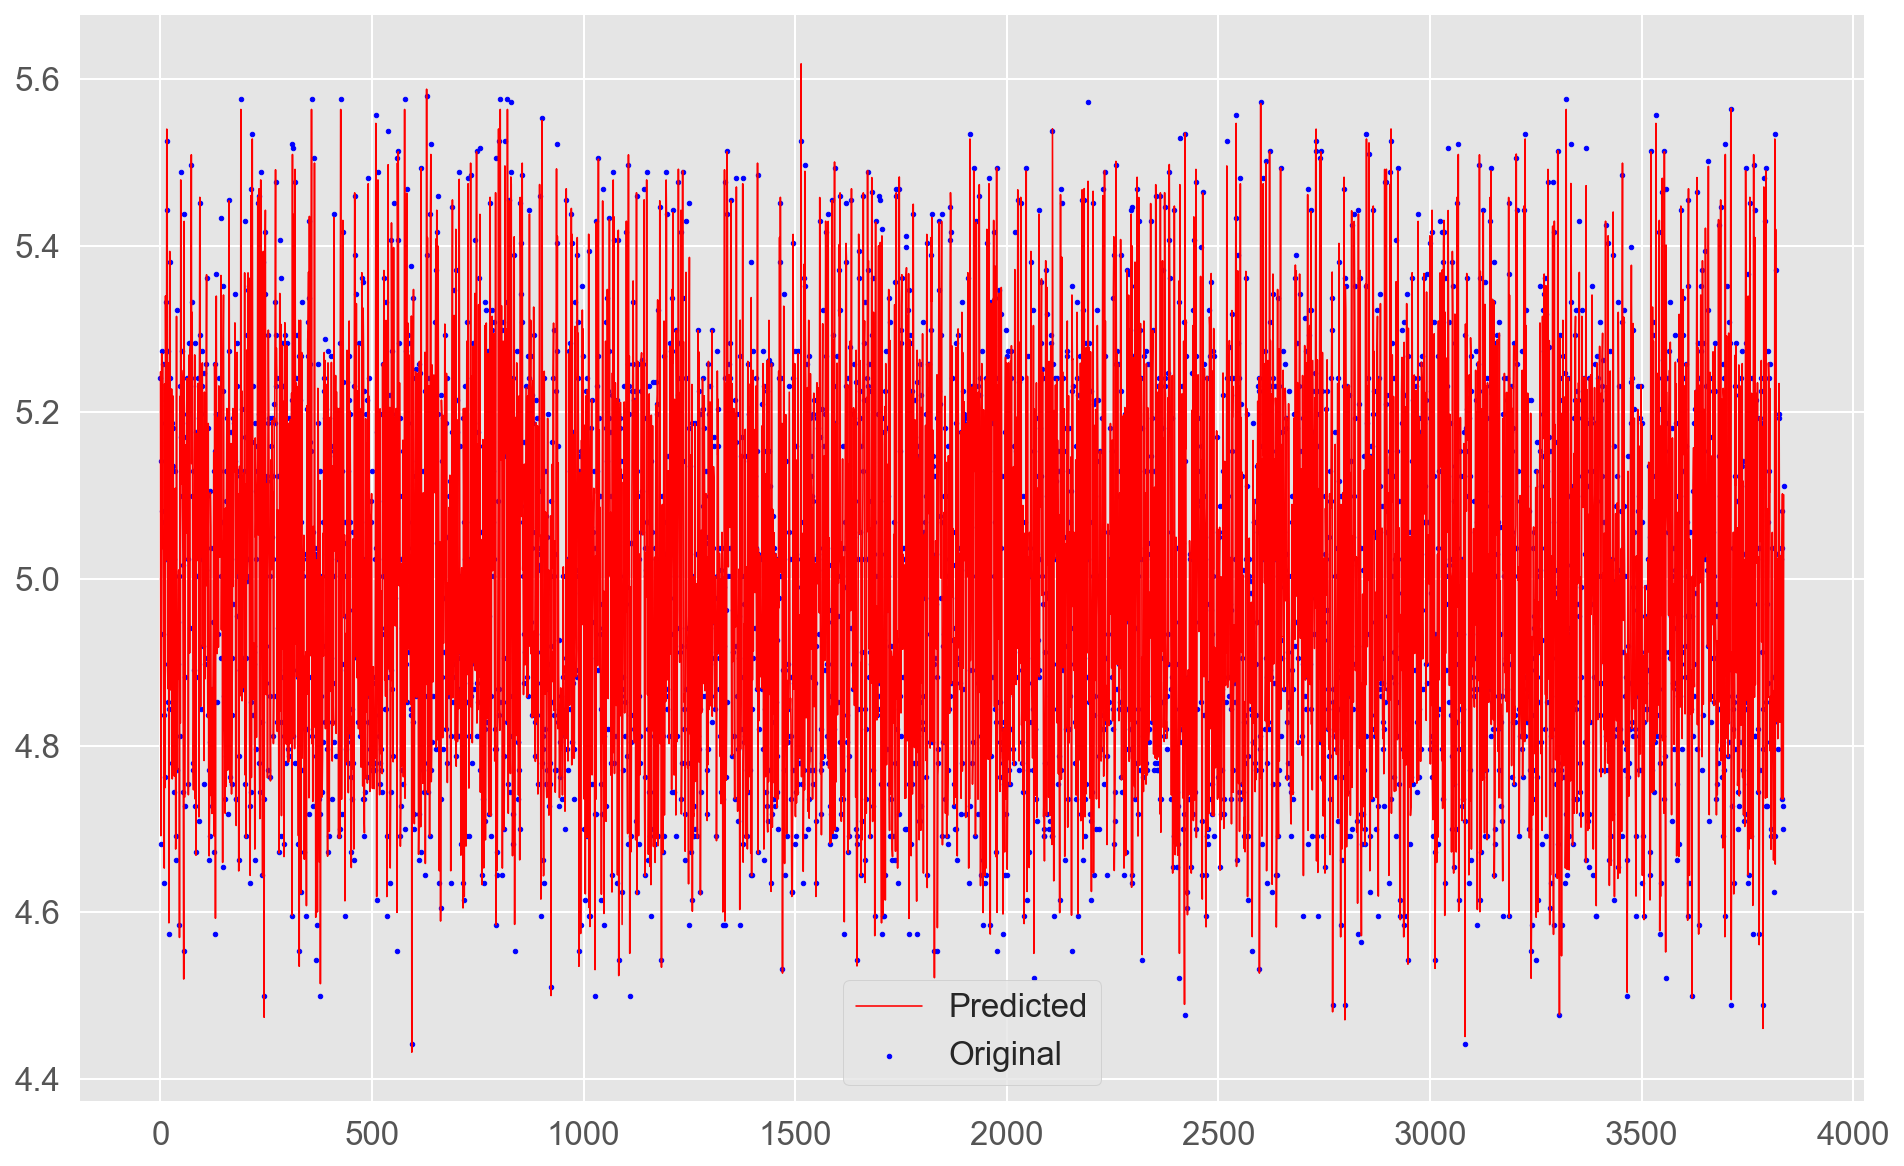

In [31]:
test_viz = range(len(X_test))
plt.scatter(test_viz , y_test, s=5, color="blue", label="Original")
plt.plot(test_viz , y_test_pred, lw=0.8, color="red", label="Predicted")
plt.legend()
plt.show()

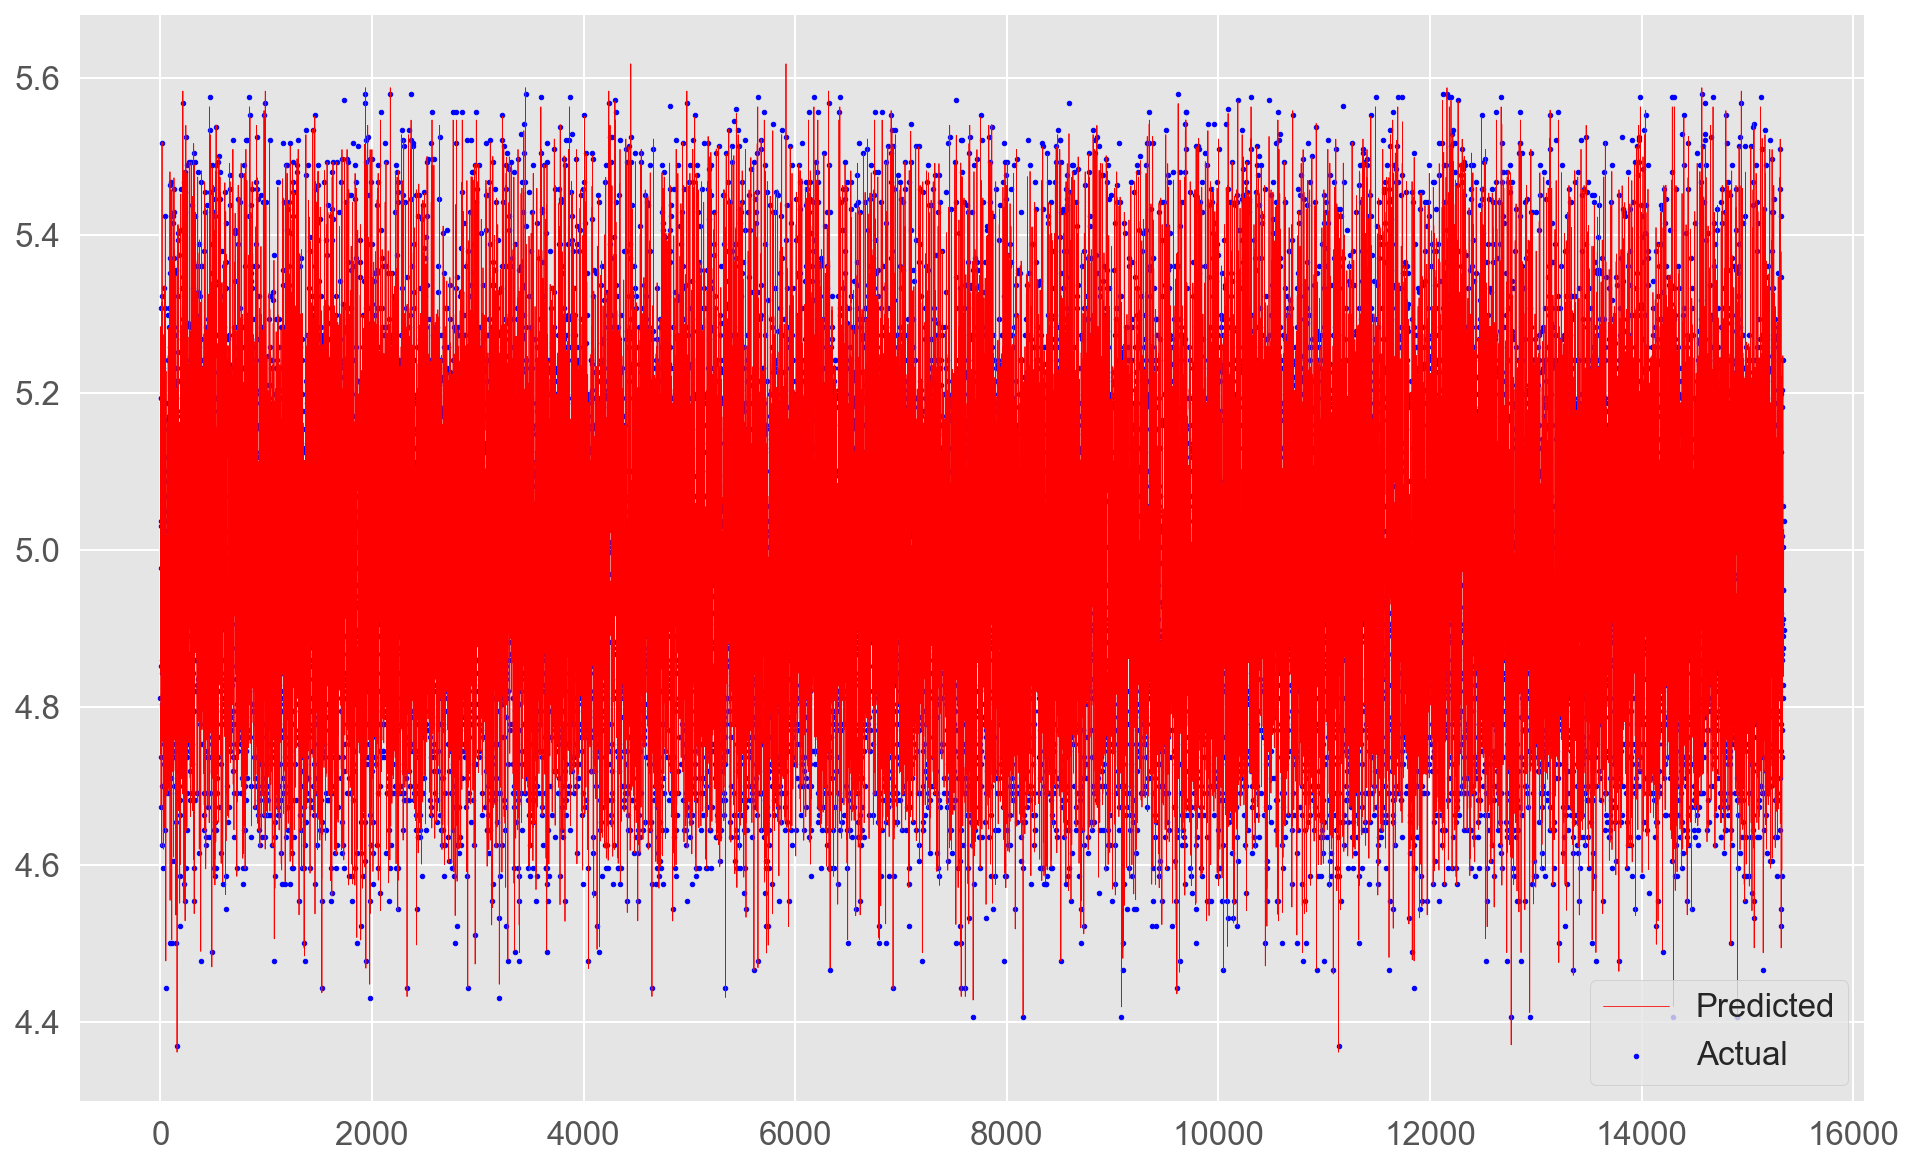

In [32]:
train_viz  = range(len(X_train))
plt.scatter(train_viz, y_train, s=5, color="blue", label="Actual")
plt.plot(train_viz, y_train_pred, lw=0.4, color="red", label="Predicted")
plt.legend()
plt.show()

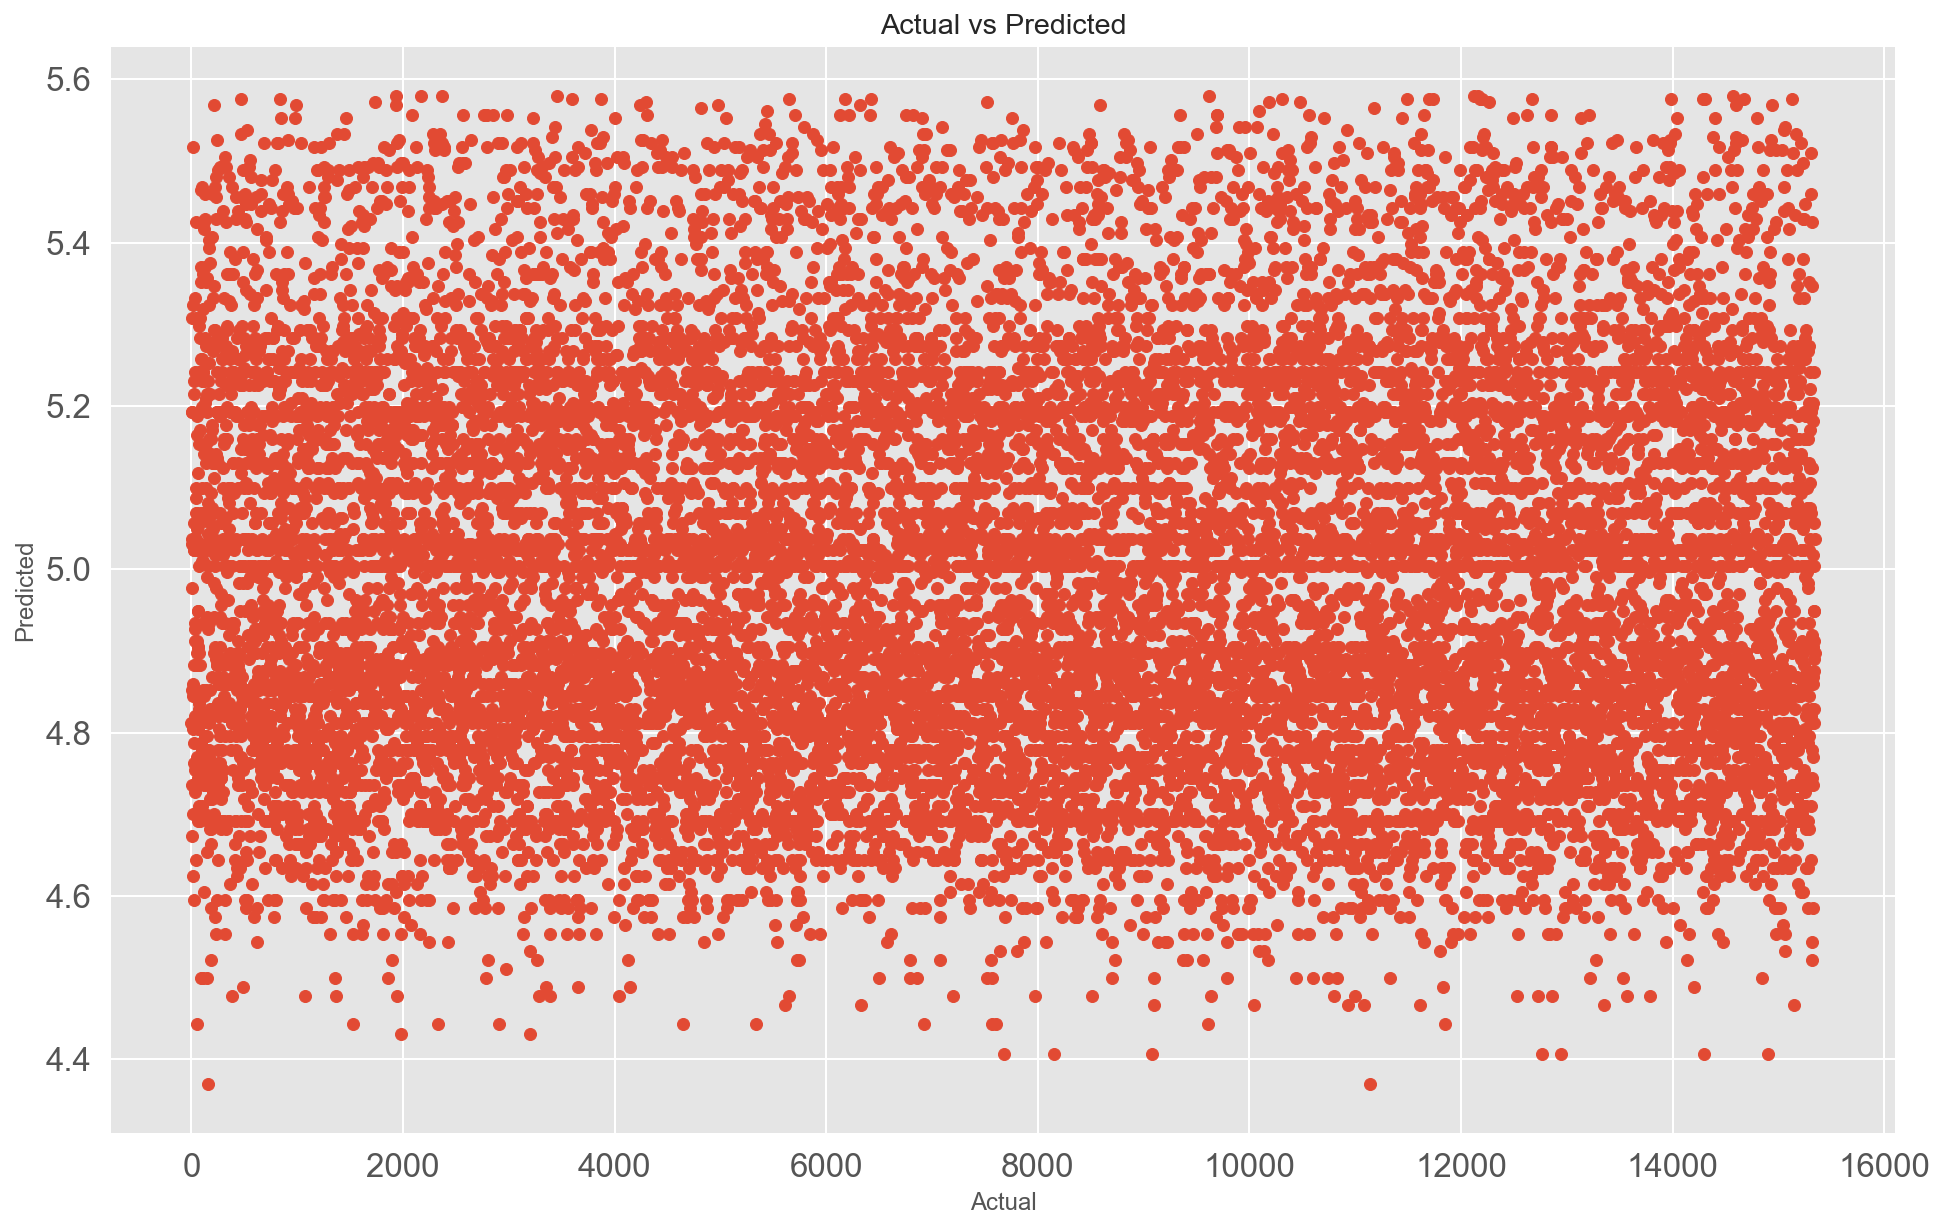

None

In [33]:
plt.figure()
train_viz  = range(len(X_train))
plt.scatter(train_viz, y_train)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
display(plt.show())

## (c). Lasso Regression

In [34]:
lasso = Lasso()

# Cross Validation Fold
folds = 5

lassoCV_Model = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lassoCV_Model.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.5s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [35]:
cv_results = pd.DataFrame(lassoCV_Model.cv_results_)

In [36]:
# Finding the R-squared value of Lasso Model
lassoCV_Model = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# Fitting the Model
lassoCV_Model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [37]:
# CV Results
cv_results = pd.DataFrame(lassoCV_Model.cv_results_)


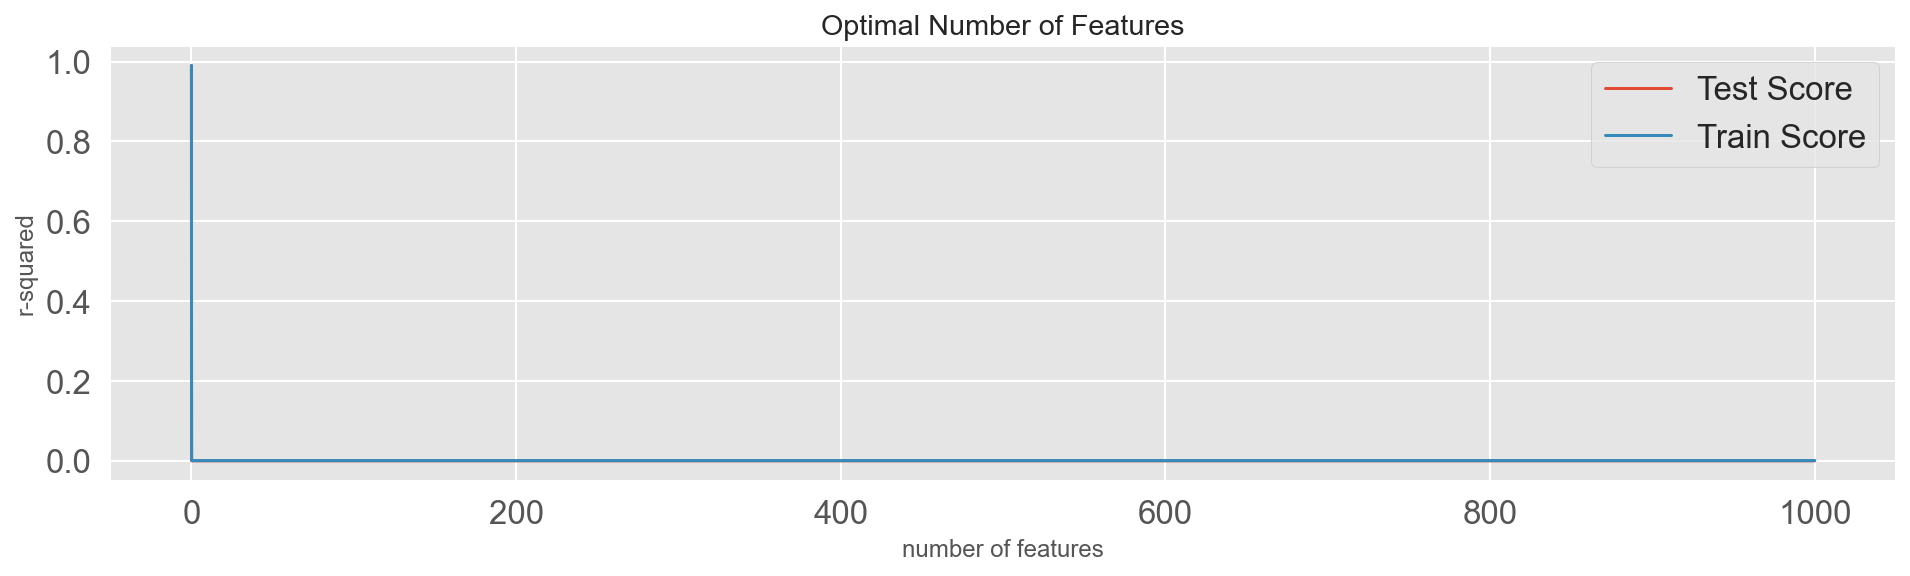

In [38]:
# Plotting CV Results
plt.figure(figsize=(16,4))
plt.plot(cv_results["param_alpha"], cv_results["mean_test_score"])
plt.plot(cv_results["param_alpha"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['Test Score', 'Train Score'], loc='upper right')

In [39]:
# Checking the Value of Optimum Number of Parameters

print(lassoCV_Model.best_params_)
print(lassoCV_Model.best_score_)

{'alpha': 0.0001}
0.9904255099124576


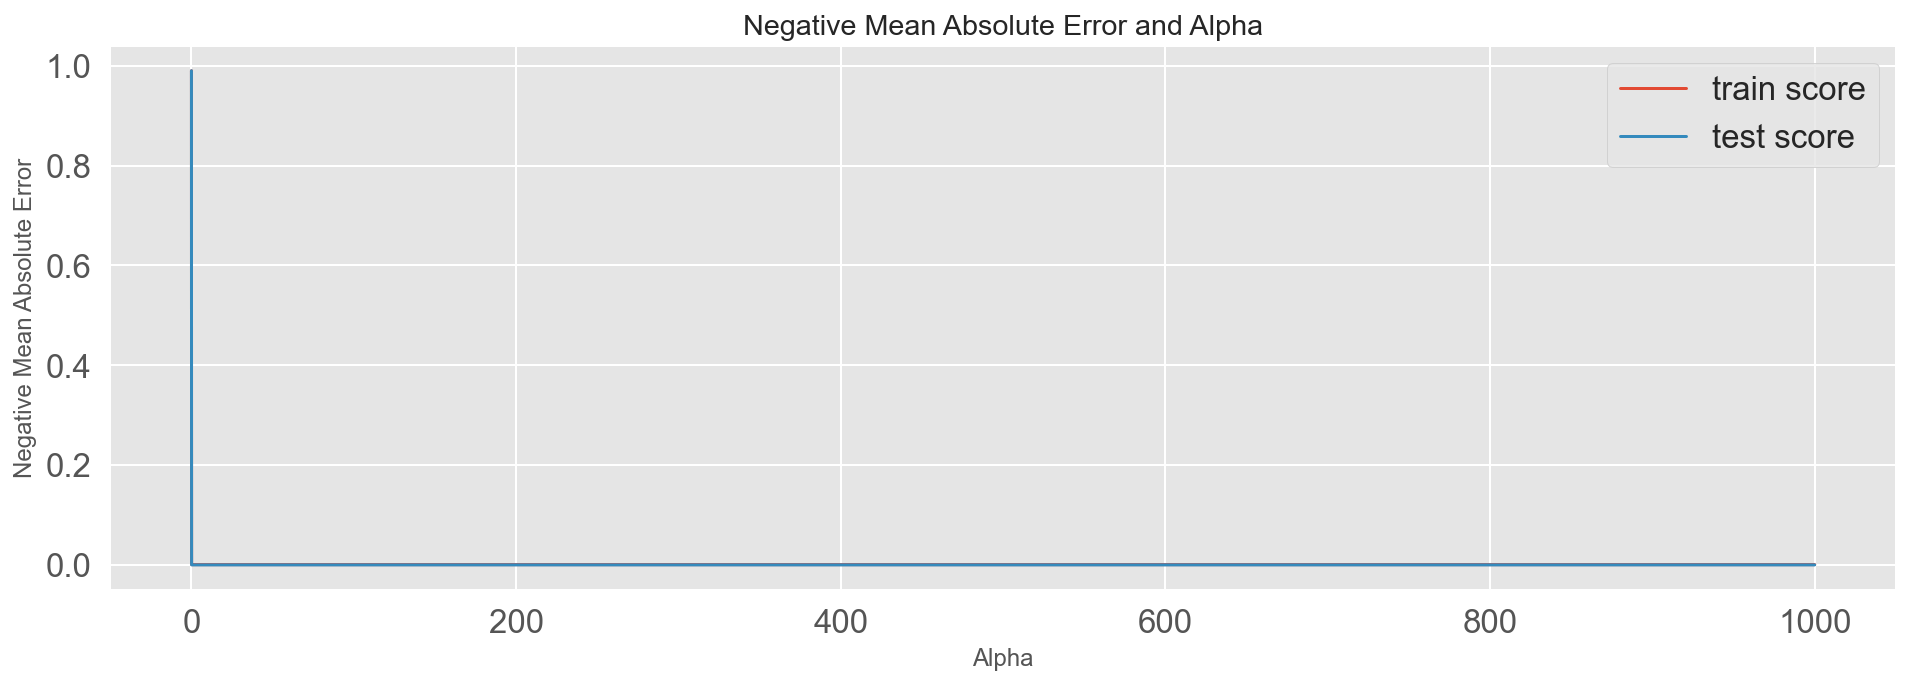

In [40]:
# Plotting Mean Test and Train Scores with Alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# Plotting
plt.figure(figsize=(16,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [41]:
# Setting the Alpha value to 0.0001 as shown from the bestparams

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

### Lasso Regression Coefficient Estimates

In [42]:
LS_Coeff = pd.DataFrame() 
LS_Coeff["Columns"] = X_train.columns 
LS_Coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 
  
print(LS_Coeff)

        Columns  Coefficient Estimate
0        Max_HP             -0.003705
1  City_Mileage             -0.000000
2   Mix_Mileage              0.883557
3          CO_1              0.000000
4           NOC              0.032949
5         HCNOX             -0.032431
6          PTCL              0.000590
7      Max_Wght              0.112493
8       Gas_ES               0.000000
9       Gas_GO               0.000000


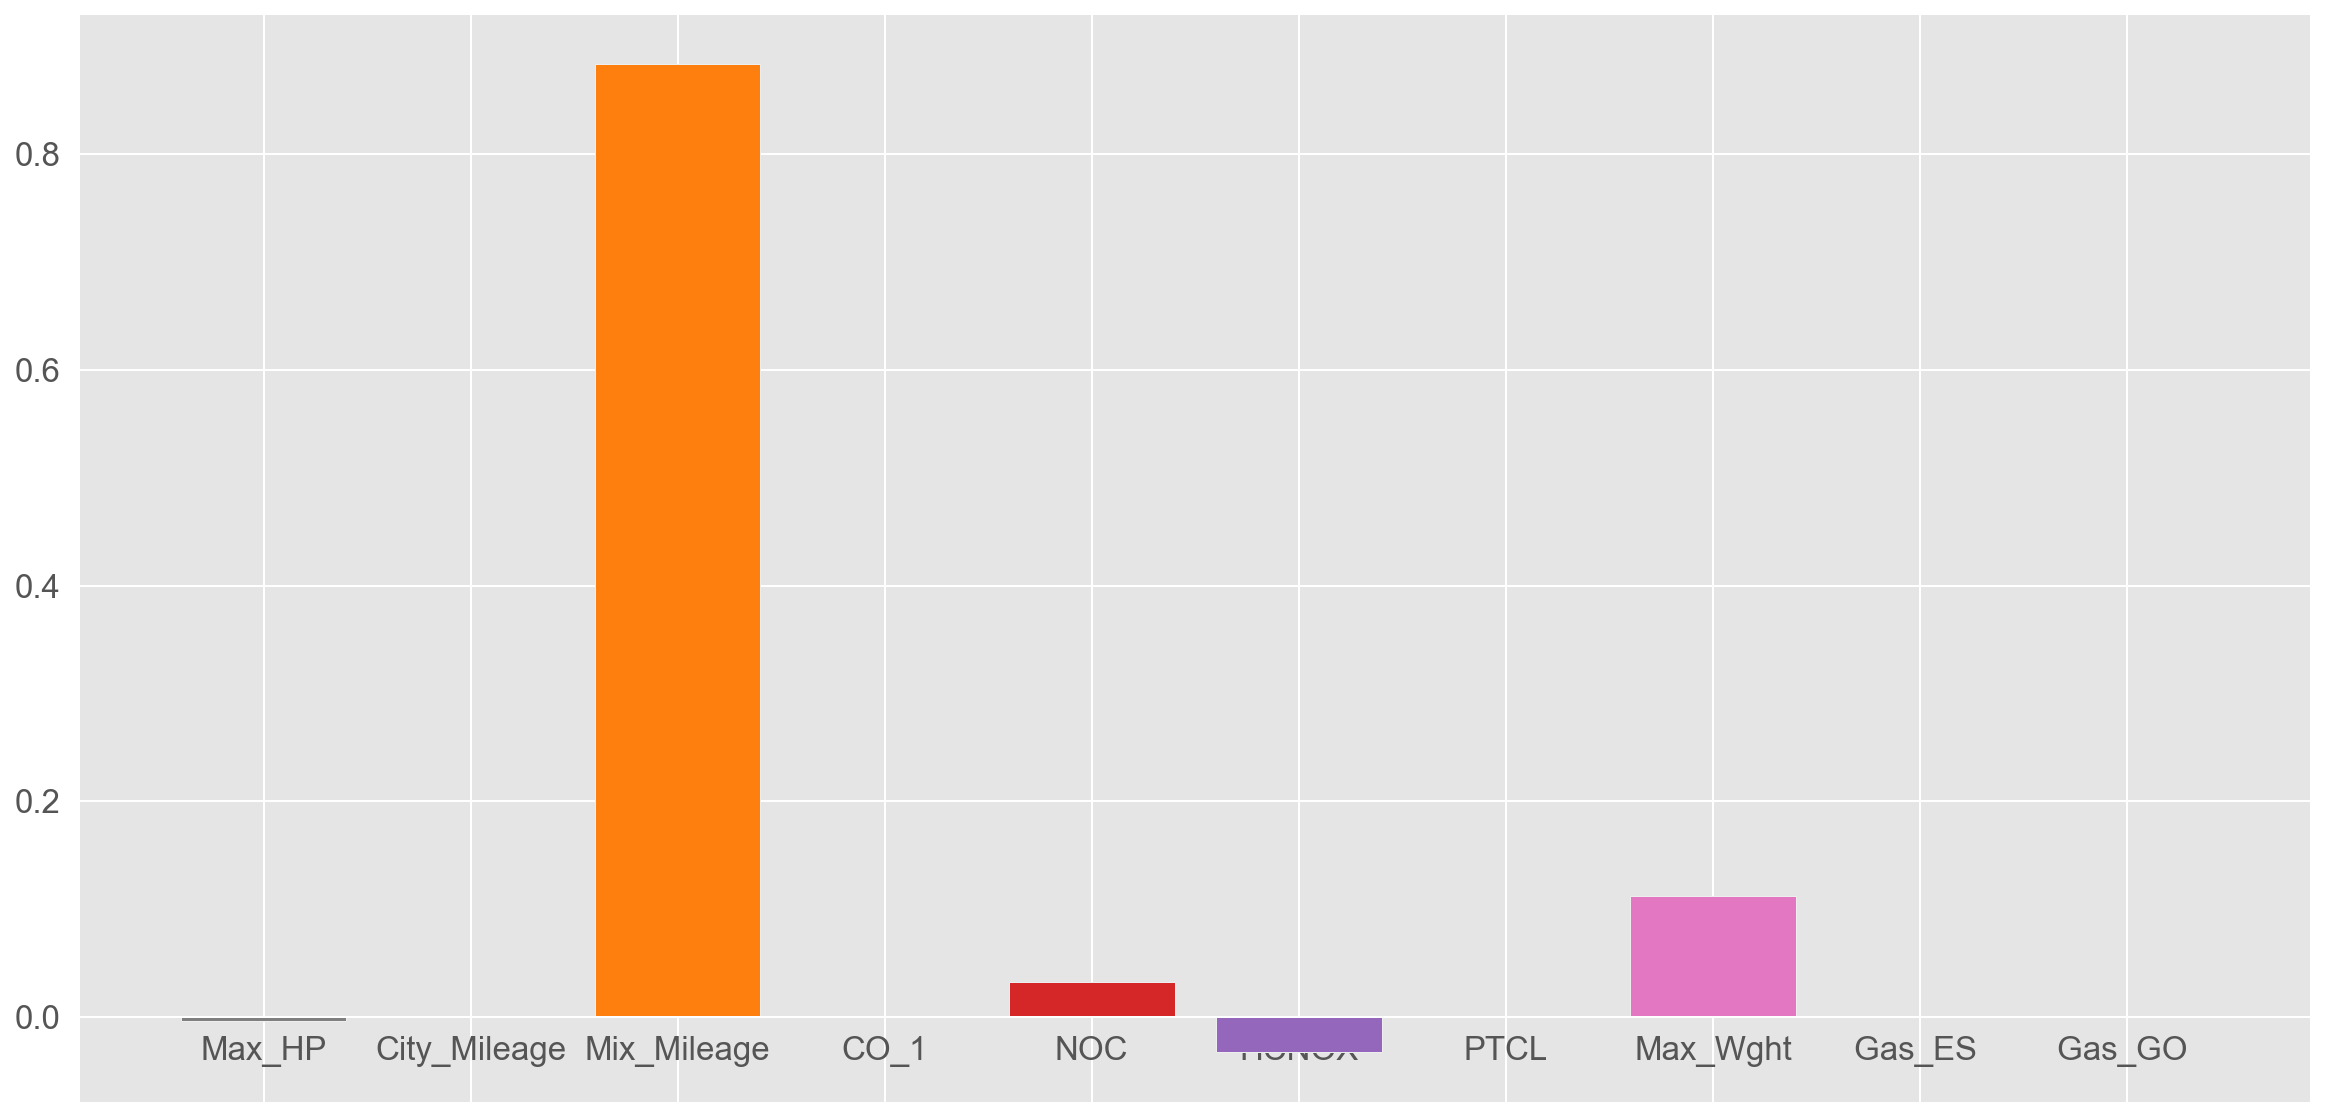

In [43]:
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(LS_Coeff["Columns"],  
LS_Coeff['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 

### Lasso Regression Model Evaluation

### Train Data Evaluation

In [44]:
y_train_pred = lasso.predict(X_train)

Train R-Squared Value

In [45]:
print('Train R2:',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

Train R2: 0.9904458489986224


Train Mean Squared Error

In [46]:
MSE_Lasso = np.mean((y_train_pred - y_train)**2) 
print('Train MSE:',MSE_Lasso)

Train MSE: 0.0005401196736183865


Train Root Mean Square Error

In [47]:
train_error_lasso = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
print('Train RMSE:', train_error_lasso)

Train RMSE: 0.023240474900878855


### Test Data Evaluation

In [48]:
y_test_pred = lasso.predict(X_test)

Test R-Squared Value

In [49]:
y_test_pred = lasso.predict(X_test)
print('Test R2:',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

Test R2: 0.9897714714770484


Test Mean Squared Error

In [50]:
MSE_Lasso = np.mean((y_test_pred - y_test)**2) 
print('Test MSE:',MSE_Lasso)

Test MSE: 0.000568157342840925


Test Root Mean Square Error

In [51]:
test_error_lasso = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Test RMSE:', test_error_lasso)

Test RMSE: 0.023836051326529016


### Test and Train Lasso Model Prediction Visualization

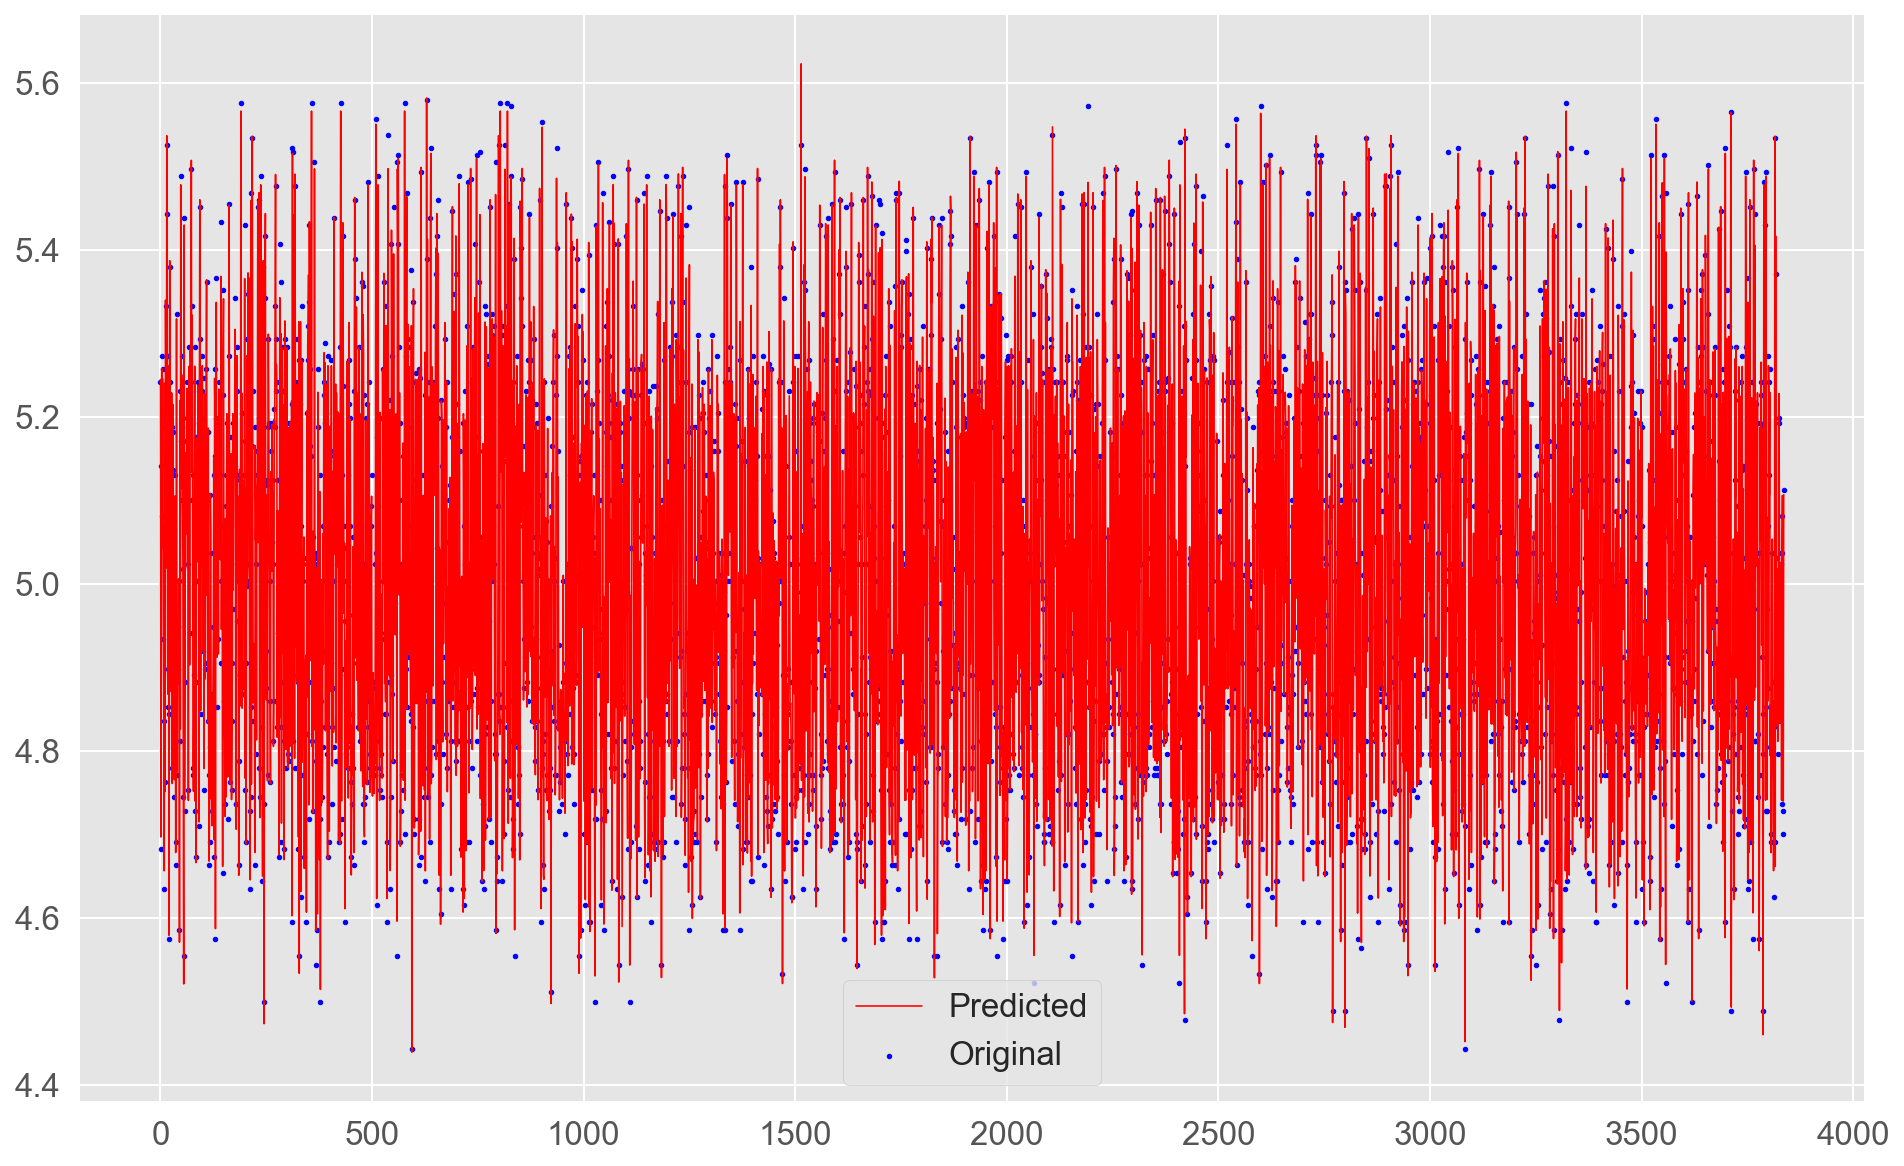

In [52]:
test_viz = range(len(X_test))
plt.scatter(test_viz, y_test, s=5, color="blue", label="Original")
plt.plot(test_viz, y_test_pred, lw=0.8, color="red", label="Predicted")
plt.legend()
plt.show()

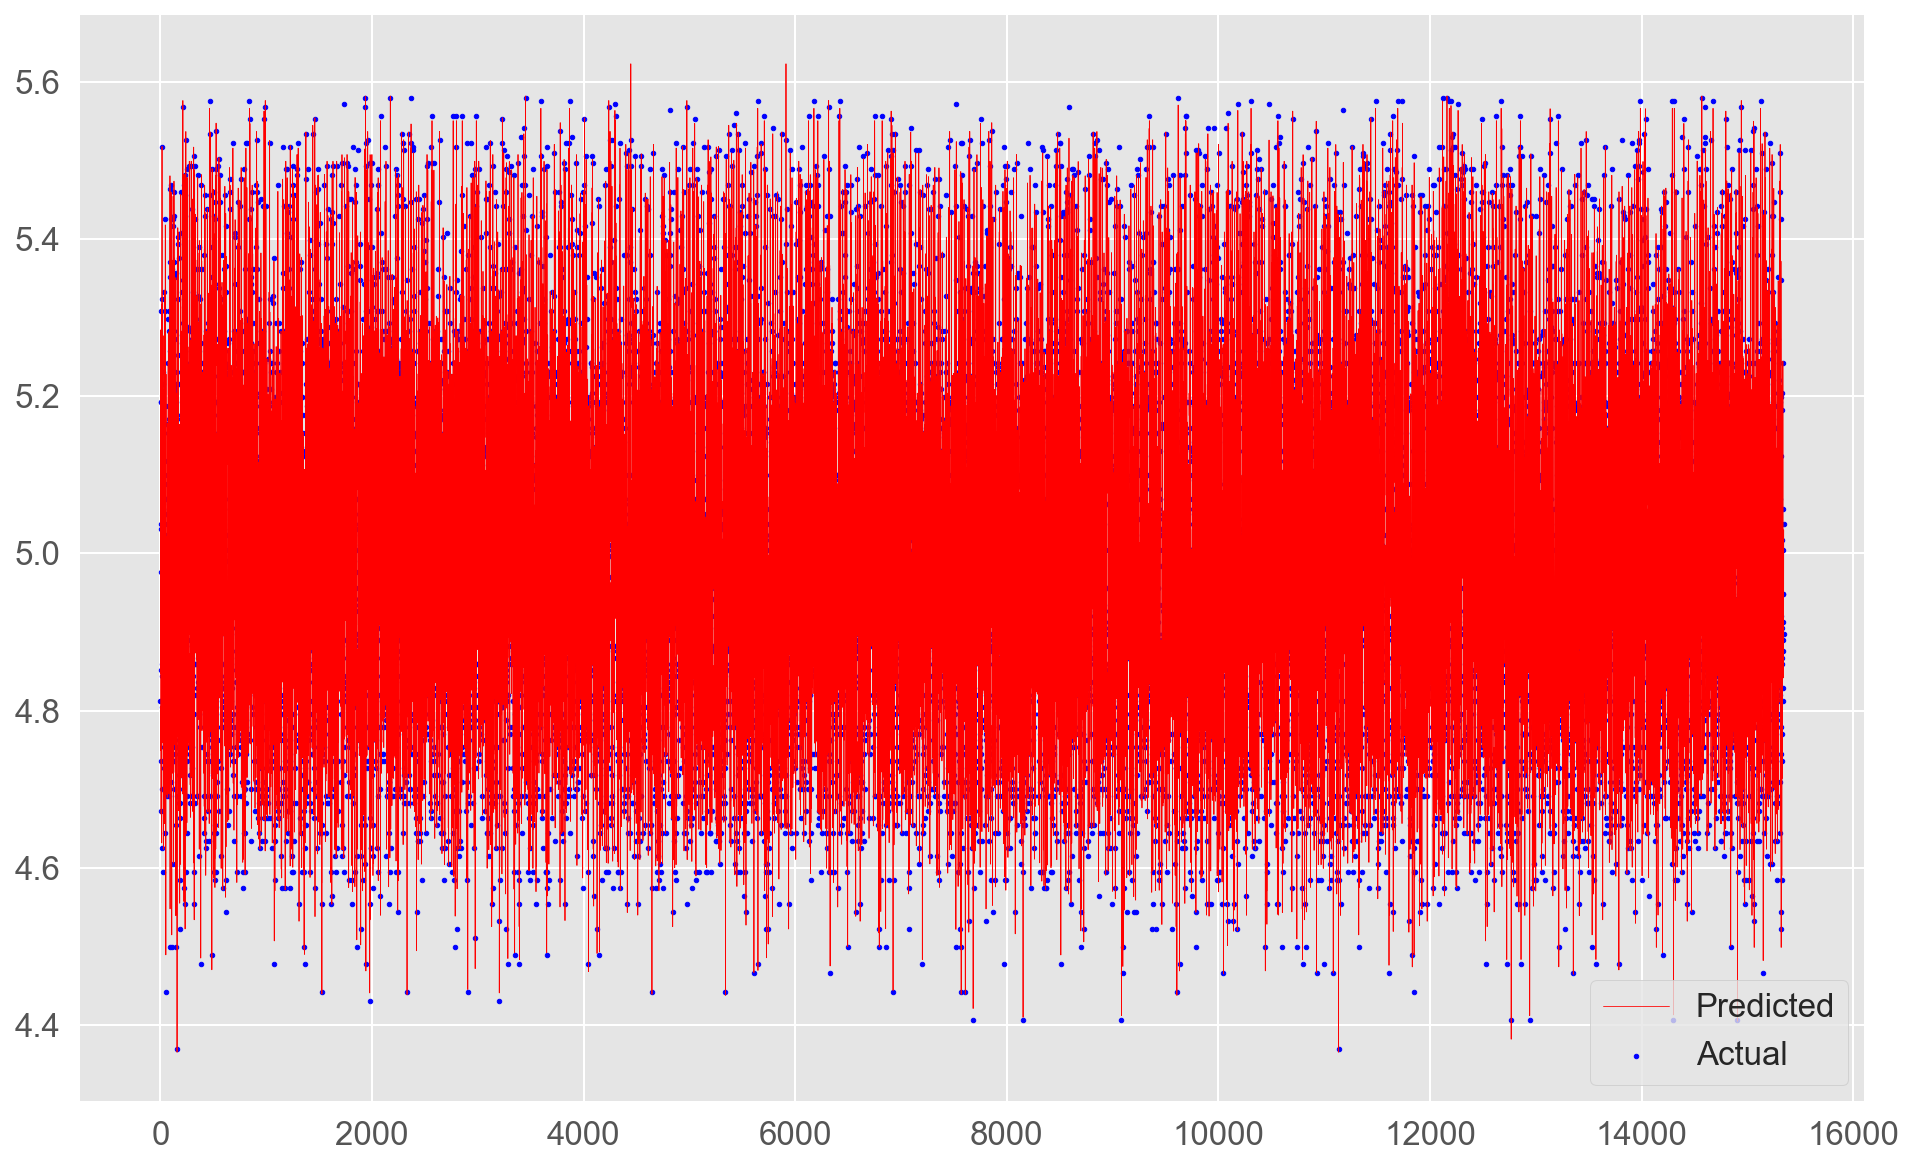

In [53]:
train_viz  = range(len(X_train))
plt.scatter(train_viz, y_train, s=5, color="blue", label="Actual")
plt.plot(train_viz, y_train_pred, lw=0.4, color="red", label="Predicted")
plt.legend()
plt.show()

## Linear Regression City CO2 Model Comparison

In [54]:
test_error=[test_error_elastic, test_error_ridge, test_error_lasso]

train_error=[train_error_elastic, train_error_ridge, train_error_lasso]

col={'Test RMSE':test_error,'Train RMSE':train_error}

models=['ElasticNet','Ridge','Lasso']
LR_Comp=DataFrame(data=col,index=models)

LR_Comp

Test RMSE  Train RMSE
ElasticNet   0.023694    0.023116
Ridge        0.023418    0.022879
Lasso        0.023836    0.023240

<AxesSubplot:>

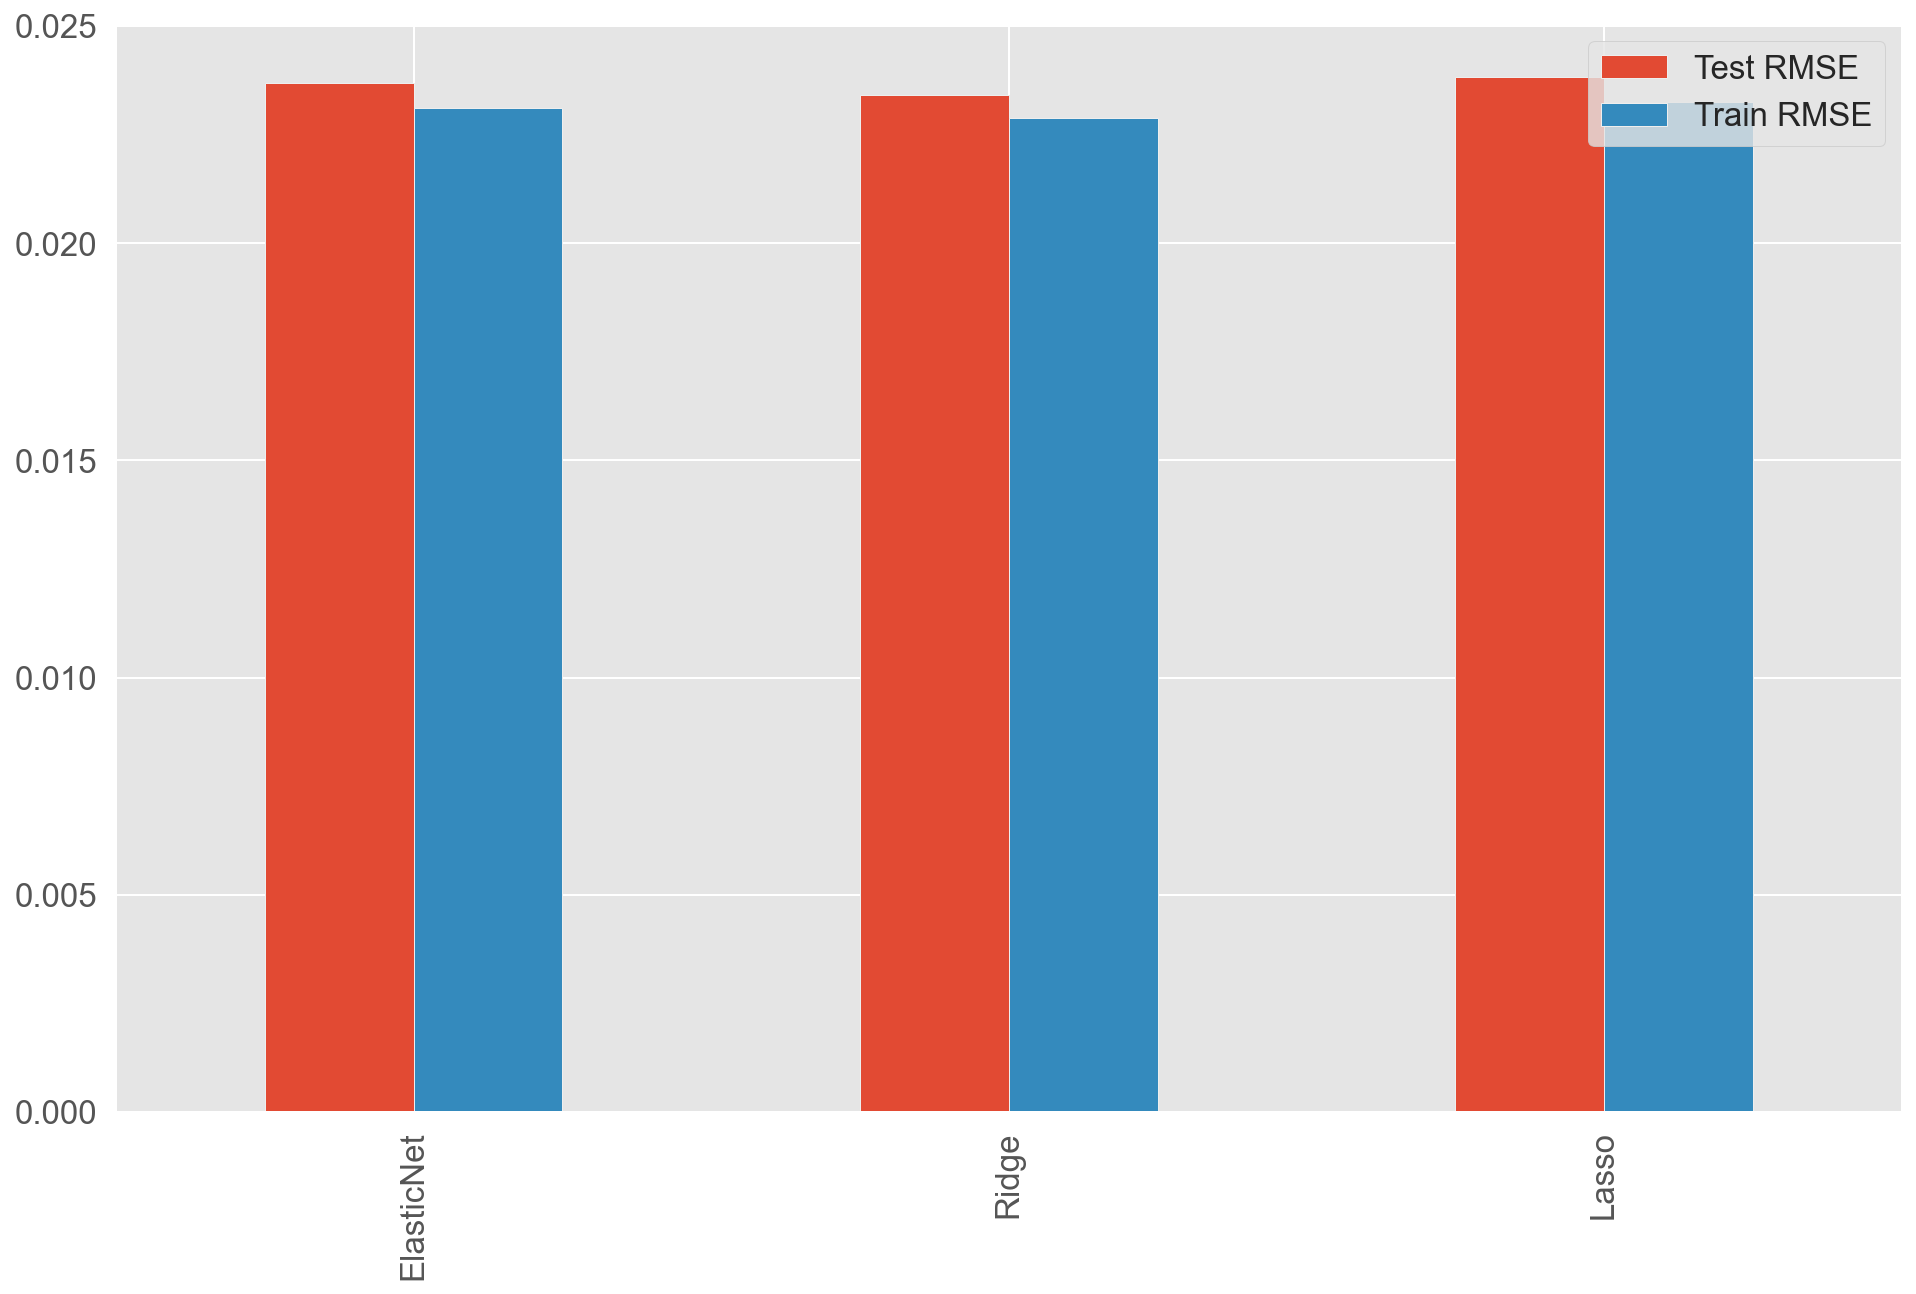

In [55]:
LR_Comp.plot(kind='bar')





# (2) Highway Route CO2 Prediction

### Data Loading & Partition 

In [56]:
df = pd.read_csv('CO2_Cleaned.csv')

df = df.drop(['City_Mileage', 'Min_Wght'], axis = 1)

target_col = "CO2"

X = df.loc[:, df.columns != target_col]
Y = df.loc[:, target_col]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_SEED)

# (a). Elastic Net Regression

In [57]:
# Model with ElasticNet Cross Validation
eCV_Model = ElasticNetCV(l1_ratio = [1, .1, .5, .7, .9, .95, .99, 1], eps = 1e-3, n_alphas = 100, 
                         fit_intercept = True, normalize = True, precompute = 'auto', max_iter = 2000, 
                         tol = 0.0001, cv = 10, copy_X = True, verbose = 0, n_jobs = -1, 
                         positive = False, random_state = 0)
               
eCV_Model.fit (X_train, y_train)

print ('Optimal Alpha:% .8f'% eCV_Model.alpha_)
print ('Optimal L1_Ratio:% .3f'% eCV_Model.l1_ratio_)
print ('No. of Iterations:% d'% eCV_Model.n_iter_)

Optimal Alpha: 0.00000189
Optimal L1_Ratio: 1.000
No. of Iterations: 241


### Elastic Net Regression Coefficient Estimates

In [58]:
EN_Coeff = pd.DataFrame() 
EN_Coeff["Columns"] = X_train.columns 
EN_Coeff['Coefficient Estimate'] = pd.Series(eCV_Model.coef_) 
  
print(EN_Coeff)

        Columns  Coefficient Estimate
0        Max_HP              0.000041
1  Hway_Mileage              0.185672
2   Mix_Mileage              0.729173
3          CO_1              0.000000
4           NOC              0.031327
5         HCNOX             -0.032604
6          PTCL              0.000614
7      Max_Wght              0.086485
8       Gas_ES               0.000000
9       Gas_GO               0.000000


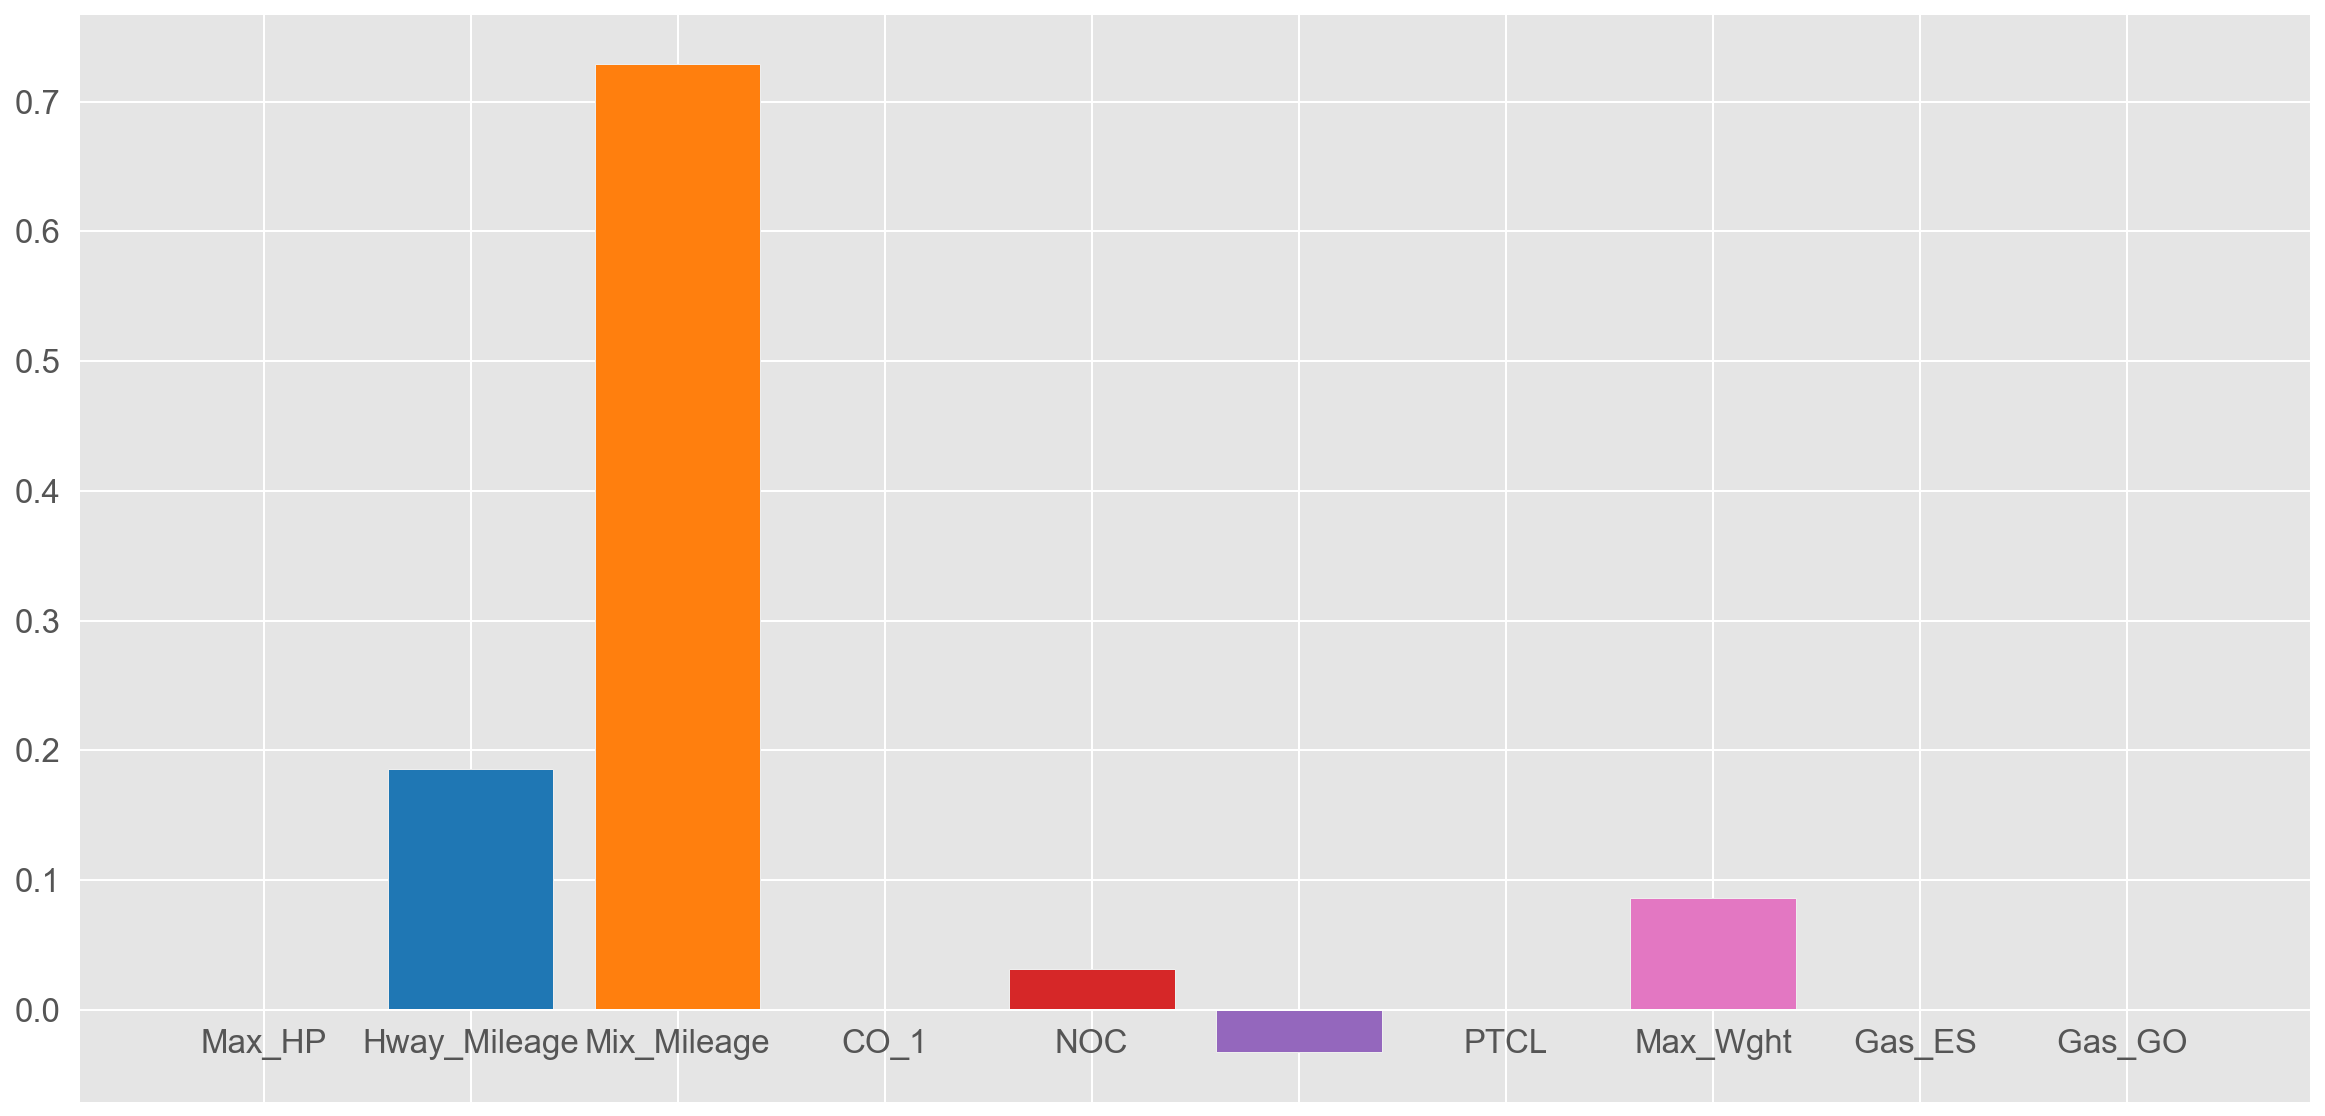

In [59]:
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(EN_Coeff["Columns"],  
EN_Coeff['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 

### Elastic Net Regression Model Evaluation

#### Train Data Evaluation

In [60]:
y_train_pred = eCV_Model.predict(X_train)

Train Root Squared Value

In [61]:
print('Train R2: ', r2_score(y_train_pred, y_train))


Train R2:  0.9910326841686151


Train Mean Squared Value

In [62]:
MSE_Elastic = np.mean((y_train_pred - y_train)**2) 
print('Elastic Regression MSE:',MSE_Elastic)

Elastic Regression MSE: 0.0005012430423063357


Train Root Mean Sqaured Error

In [63]:
train_error_elastic = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
print('Train RMSE:', train_error_elastic)

Train RMSE: 0.022388457792048604


#### Test Data Evaluation

In [64]:
y_pred = eCV_Model.predict(X_test)

Test Root Squared Value

In [65]:
print('Test R2: ', r2_score(y_pred, y_test))

Test R2:  0.9906522313823504


Test Mean Squared Error

In [66]:
MSE_Elastic = np.mean((y_pred - y_test)**2) 
print('Test MSE:',MSE_Elastic)

Test MSE: 0.000514105361424213


Train Root Mean Sqaured Error

In [67]:
test_error_elastic = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Test RMSE:', test_error_elastic)

Test RMSE: 0.022673891625043394


### Test and Train Elastic Net Model Visualization

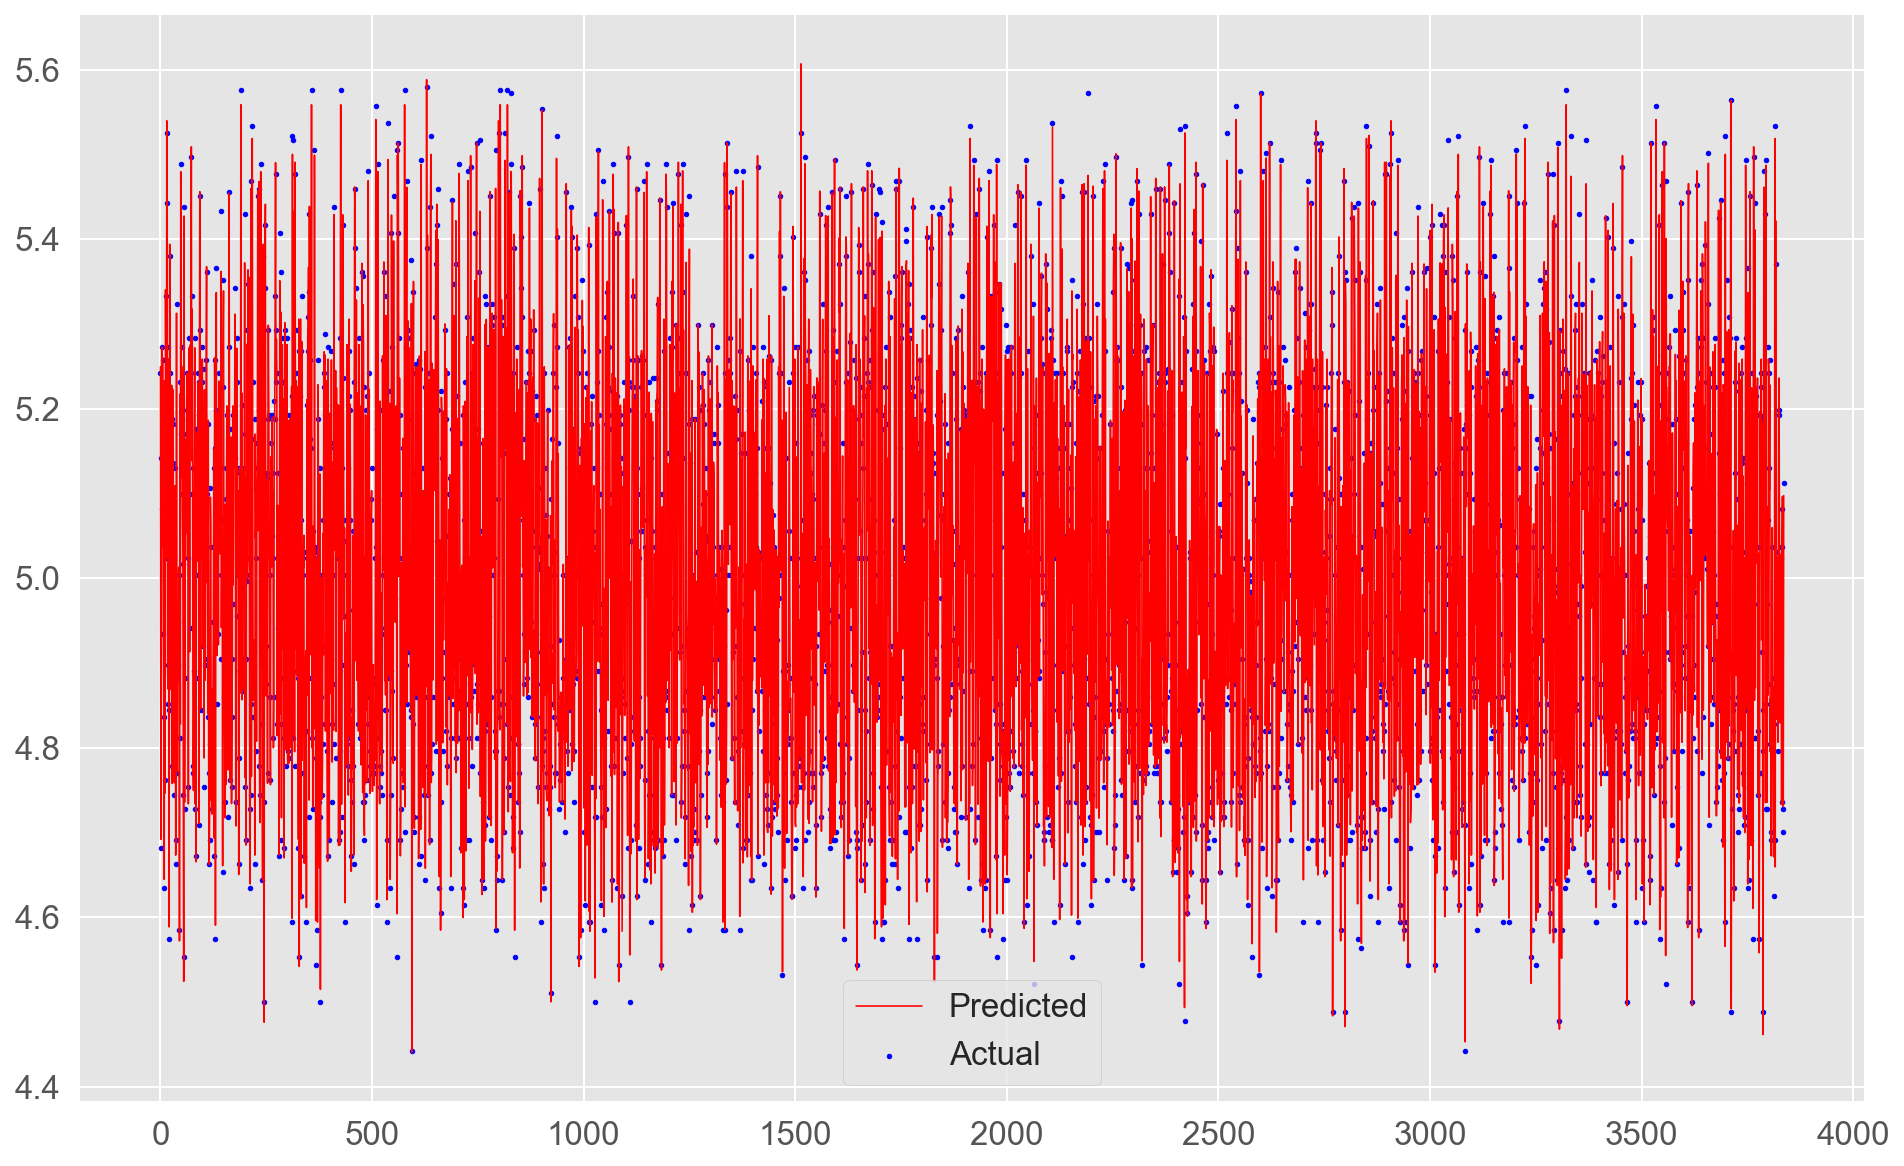

In [68]:
test_viz = range(len(X_test))
plt.scatter(test_viz , y_test, s=5, color="blue", label="Actual")
plt.plot(test_viz , y_pred, lw=0.8, color="red", label="Predicted")
plt.legend()
plt.show()

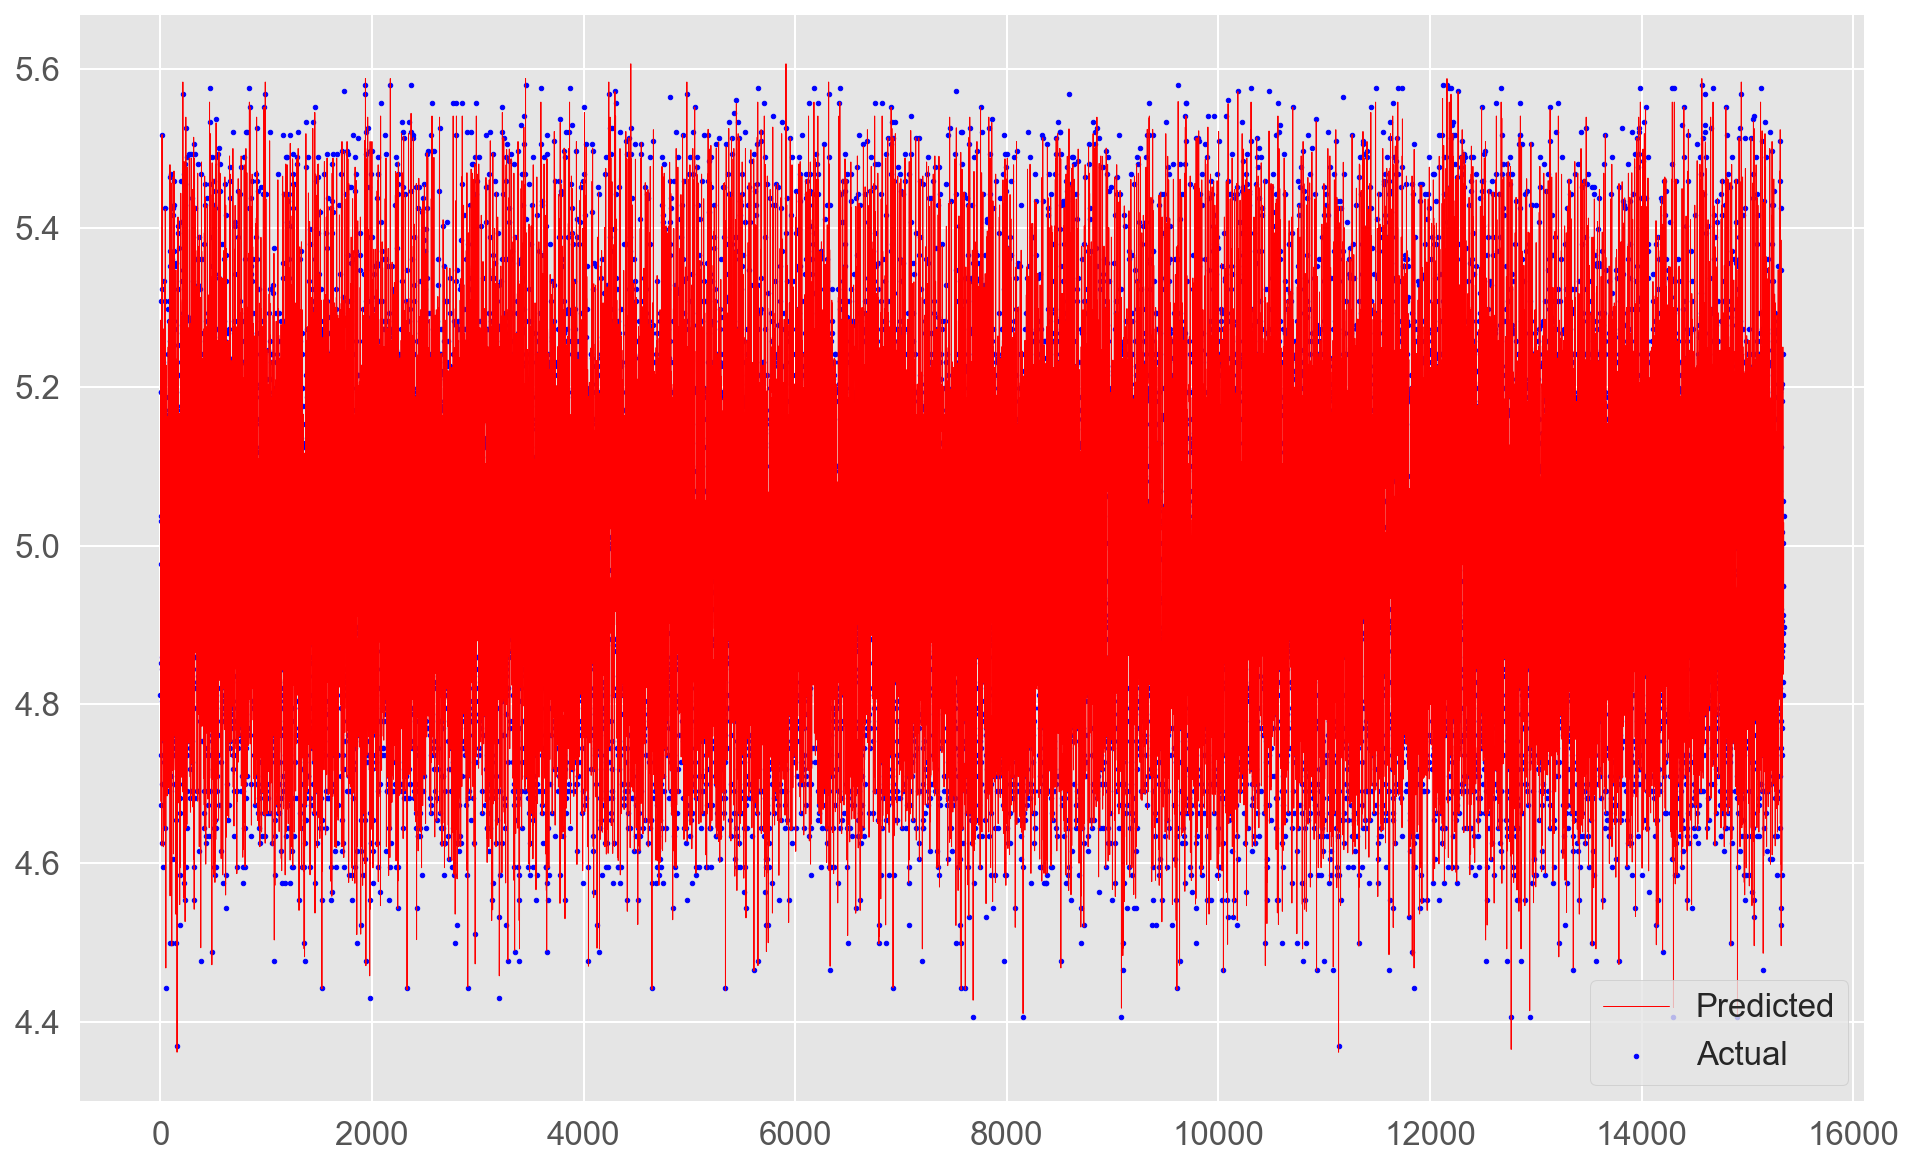

In [69]:
train_viz  = range(len(X_train))
plt.scatter(train_viz , y_train, s=5, color="blue", label="Actual")
plt.plot(train_viz , y_train_pred, lw=0.5, color="red", label="Predicted")
plt.legend()
plt.show()

# (b). Ridge Regression

In [70]:
# List of Alphas to Tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# Cross Validation
folds = 5

ridgeCV_Model = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridgeCV_Model.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [71]:
# Checking the Value of Optimum Number of Parameters

print(ridgeCV_Model.best_params_)
print(ridgeCV_Model.best_score_)

{'alpha': 0.0001}
-0.016931908305540623


In [72]:
CV_Results = pd.DataFrame(ridgeCV_Model.cv_results_)
CV_Results= CV_Results[CV_Results['param_alpha']<=1000]
CV_Results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.003459      0.000385         0.001870        0.000185      0.0001   
1        0.003625      0.000538         0.001889        0.000280       0.001   
2        0.002806      0.000207         0.001698        0.000326        0.01   
3        0.002727      0.000014         0.001448        0.000007        0.05   
4        0.002759      0.000052         0.001469        0.000030         0.1   
5        0.002724      0.000038         0.001444        0.000003         0.2   
6        0.003131      0.000467         0.001529        0.000061         0.3   
7        0.003617      0.000653         0.002113        0.000407         0.4   
8        0.003492      0.000614         0.001759        0.000174         0.5   
9        0.002916      0.000323         0.001584        0.000169         0.6   
10       0.002758      0.000083         0.001501        0.000063         0.7   
11       0.002754      0.000058         0.001462        0.000022         0.8   
12       0.002762      0.000016         0.001463        0.000013         0.9   
13       0.002788      0.000019         0.001477        0.000025           1   
14       0.002784      0.000025         0.001469        0.000013           2   
15       0.002829      0.000104         0.001479        0.000023           3   
16       0.002735      0.000012         0.001476        0.000028           4   
17       0.002781      0.000045         0.001450        0.000008           5   
18       0.002728      0.000051         0.001458        0.000041           6   
19       0.002759      0.000062         0.001464        0.000020           7   
20       0.002914      0.000398         0.001472        0.000043           8   
21       0.002765      0.000047         0.001463        0.000023           9   
22       0.002922      0.000357         0.001474        0.000022          10   
23       0.002879      0.000243         0.001493        0.000086          20   
24       0.002750      0.000029         0.001507        0.000086          50   
25       0.002780      0.000071         0.001463        0.000018         100   
26       0.002748      0.000023         0.001448        0.000012         500   
27       0.002812      0.000110         0.001492        0.000059        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.016760          -0.017230   
1    {'alpha': 0.001}          -0.016760          -0.017230   
2     {'alpha': 0.01}          -0.016760          -0.017230   
3     {'alpha': 0.05}          -0.016762          -0.017231   
4      {'alpha': 0.1}          -0.016765          -0.017233   
5      {'alpha': 0.2}          -0.016770          -0.017236   
6      {'alpha': 0.3}          -0.016776          -0.017240   
7      {'alpha': 0.4}          -0.016783          -0.017245   
8      {'alpha': 0.5}          -0.016790          -0.017250   
9      {'alpha': 0.6}          -0.016796          -0.017255   
10     {'alpha': 0.7}          -0.016804          -0.017260   
11     {'alpha': 0.8}          -0.016811          -0.017266   
12     {'alpha': 0.9}          -0.016819          -0.017272   
13     {'alpha': 1.0}          -0.016828          -0.017278   
14     {'alpha': 2.0}          -0.016920          -0.017345   
15     {'alpha': 3.0}          -0.017017          -0.017419   
16     {'alpha': 4.0}          -0.017111          -0.017502   
17     {'alpha': 5.0}          -0.017205          -0.017591   
18     {'alpha': 6.0}          -0.017298          -0.017683   
19     {'alpha': 7.0}          -0.017389          -0.017774   
20     {'alpha': 8.0}          -0.017480          -0.017861   
21     {'alpha': 9.0}          -0.017568          -0.017950   
22    {'alpha': 10.0}          -0.017655          -0.018039   
23      {'alpha': 20}          -0.018475          -0.018899   
24      {'alpha': 50}          -0.021072          -0.021515   
25     {'alpha': 100}          -0.025254     

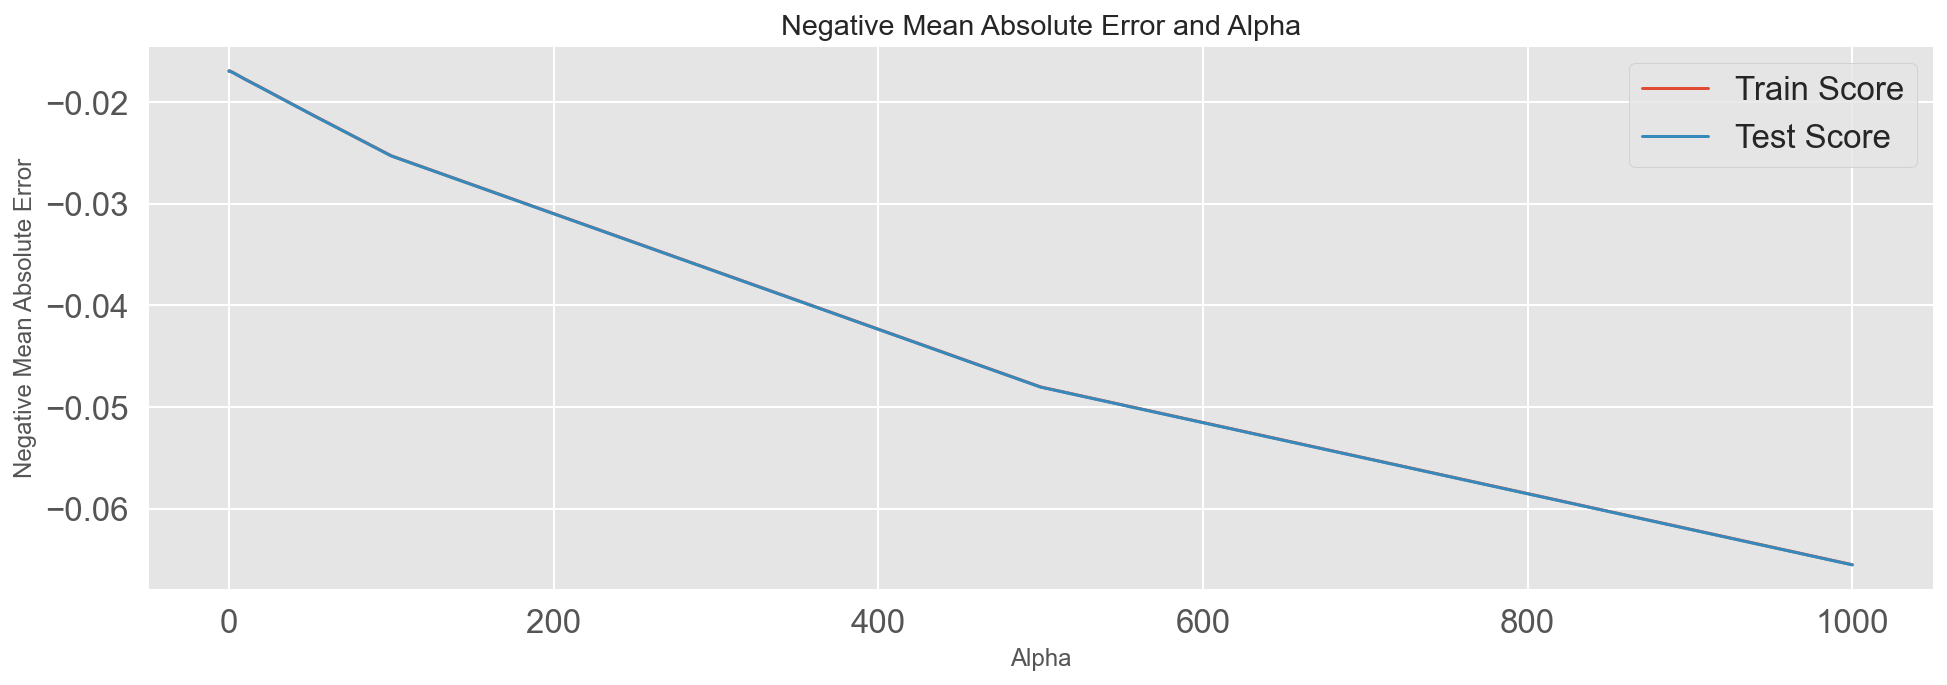

In [73]:
# Plotting Mean Test & Train Scores with Alpha 
CV_Results['param_alpha'] = CV_Results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# Plotting
plt.plot(CV_Results['param_alpha'], CV_Results['mean_train_score'])
plt.plot(CV_Results['param_alpha'], CV_Results['mean_test_score'])
plt.xlabel('Alpha')

plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['Train Score', 'Test Score'], loc='upper right')
plt.show()

### Ridge Regression Coefficient Estimates

In [74]:
alpha = 0.0001
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-5.33136907e-04,  1.80518189e-01,  7.38151566e-01,  4.27122834e-04,
        3.23315004e-02, -3.50773929e-02,  7.27932194e-04,  8.43734814e-02,
        0.00000000e+00,  0.00000000e+00])

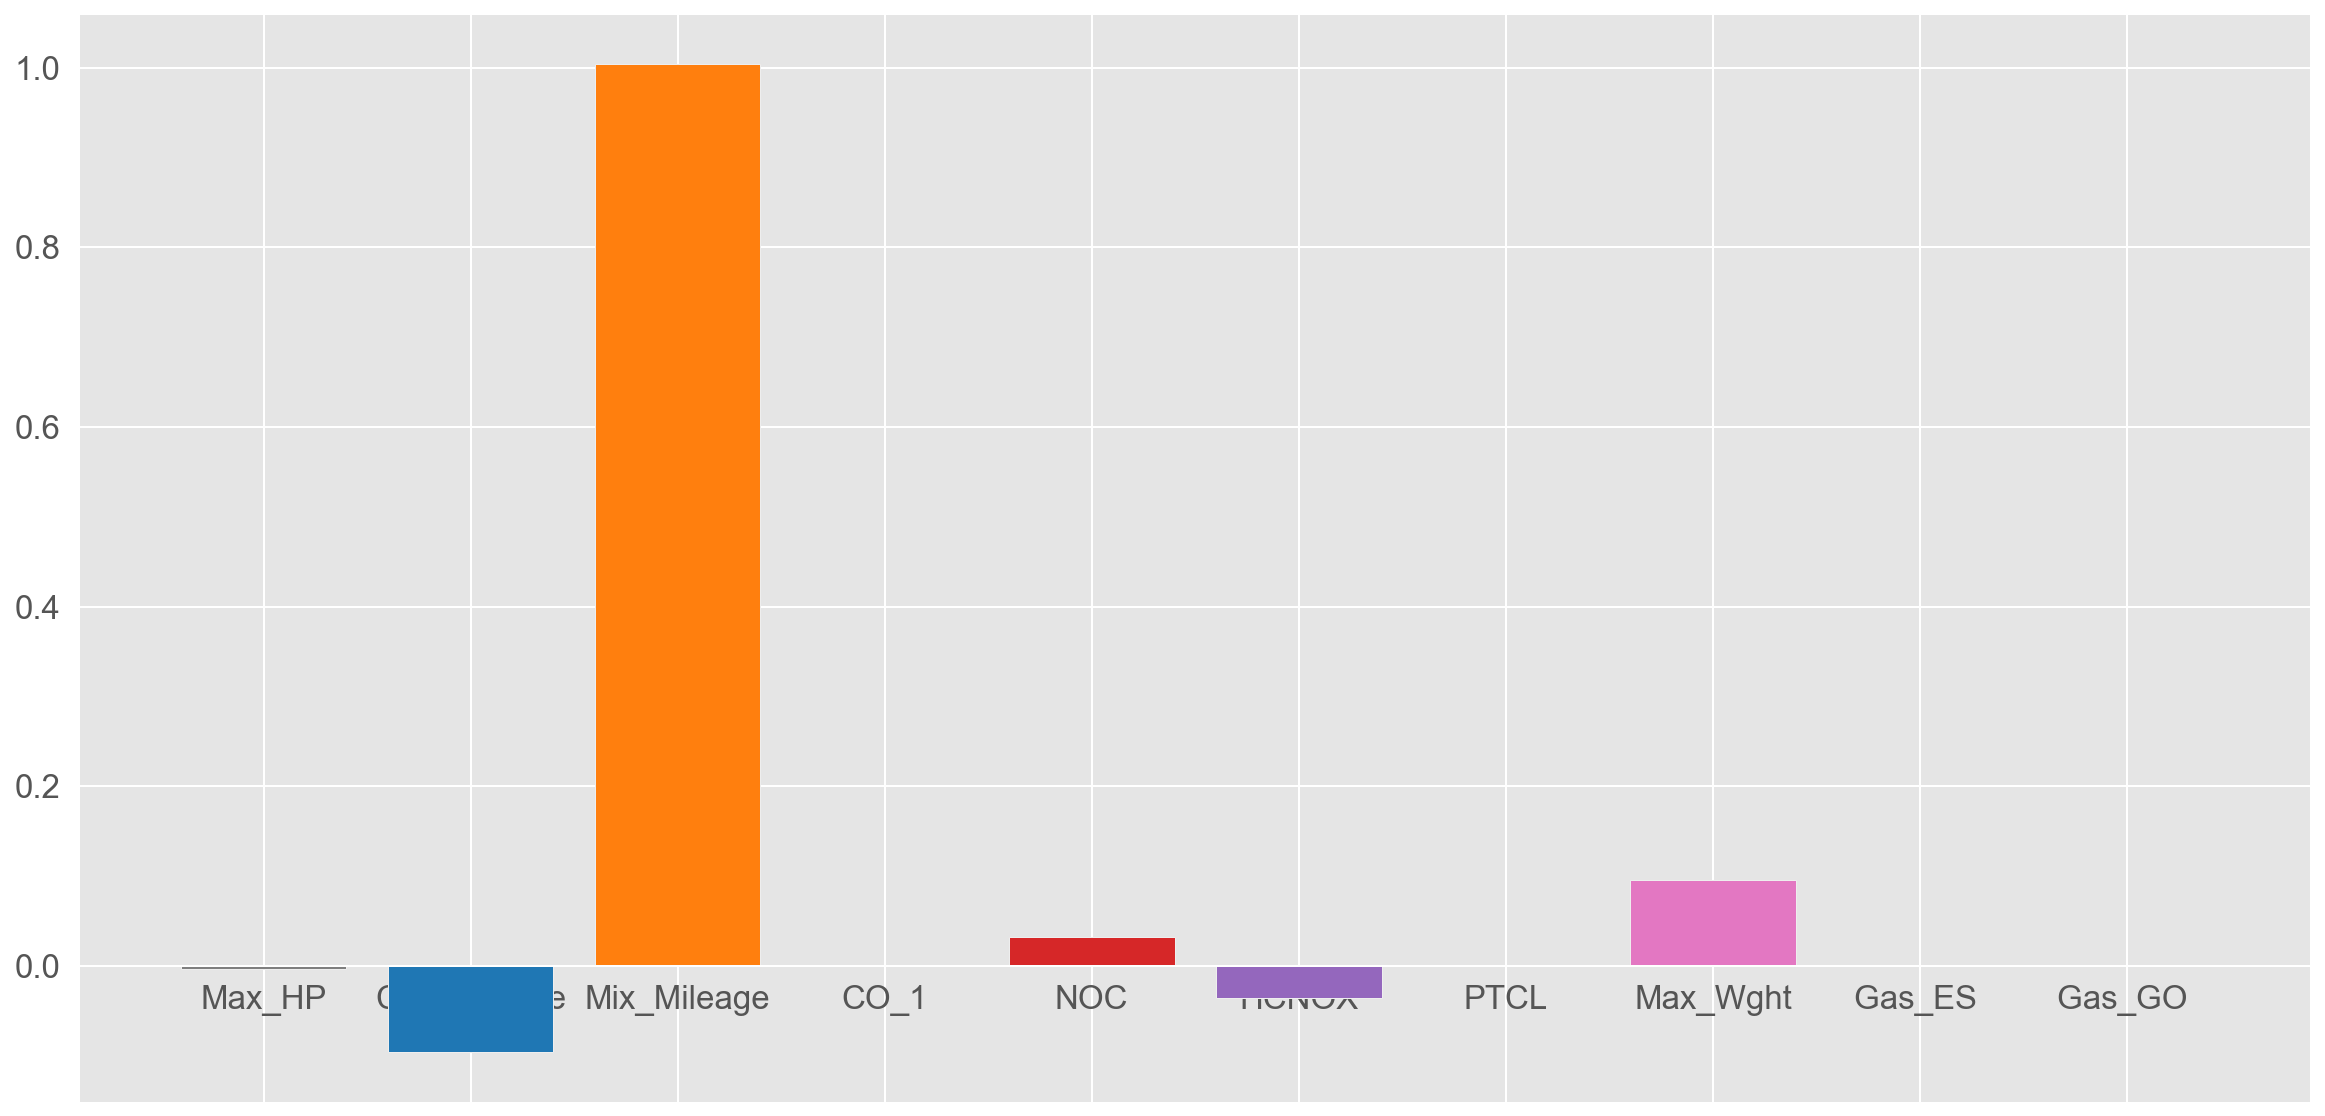

In [75]:
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(RD_Coeff["Feature"],  
RD_Coeff['Coefficient'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 

### Ridge Regression Model Evaluation

#### Train Data Evaluation

In [76]:
y_train_pred = ridge.predict(X_train)

Train R-Squared Value

In [77]:
print('Train R2:',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

Train R2: 0.9911456681526006


Train Mean Squared Error

In [78]:
MSE_Ridge = np.mean((y_train_pred - y_train)**2) 
print('Ridge Regression MSE:',MSE_Ridge)

Ridge Regression MSE: 0.0005005571742415019


Train Root Mean Square Error

In [79]:
train_error_ridge = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
print('Train RMSE:', train_error_ridge)

Train RMSE: 0.022373135100863802


## Test Data Evaluation

In [80]:
y_test_pred = ridge.predict(X_test)

Test Data R-Squared Value

In [81]:
print('Train R2:',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

Train R2: 0.9907351230170989


Test Mean Squared Error

In [82]:
MSE_Ridge = np.mean((y_test_pred - y_test)**2) 
print('Ridge Regression MSE:',MSE_Ridge)

Ridge Regression MSE: 0.0005146300248898489


Test Root Mean Square Error

In [83]:
test_error_ridge = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Test RMSE:', test_error_ridge)

Test RMSE: 0.02268545844566183


### Test and Train Ridge Model Visualization

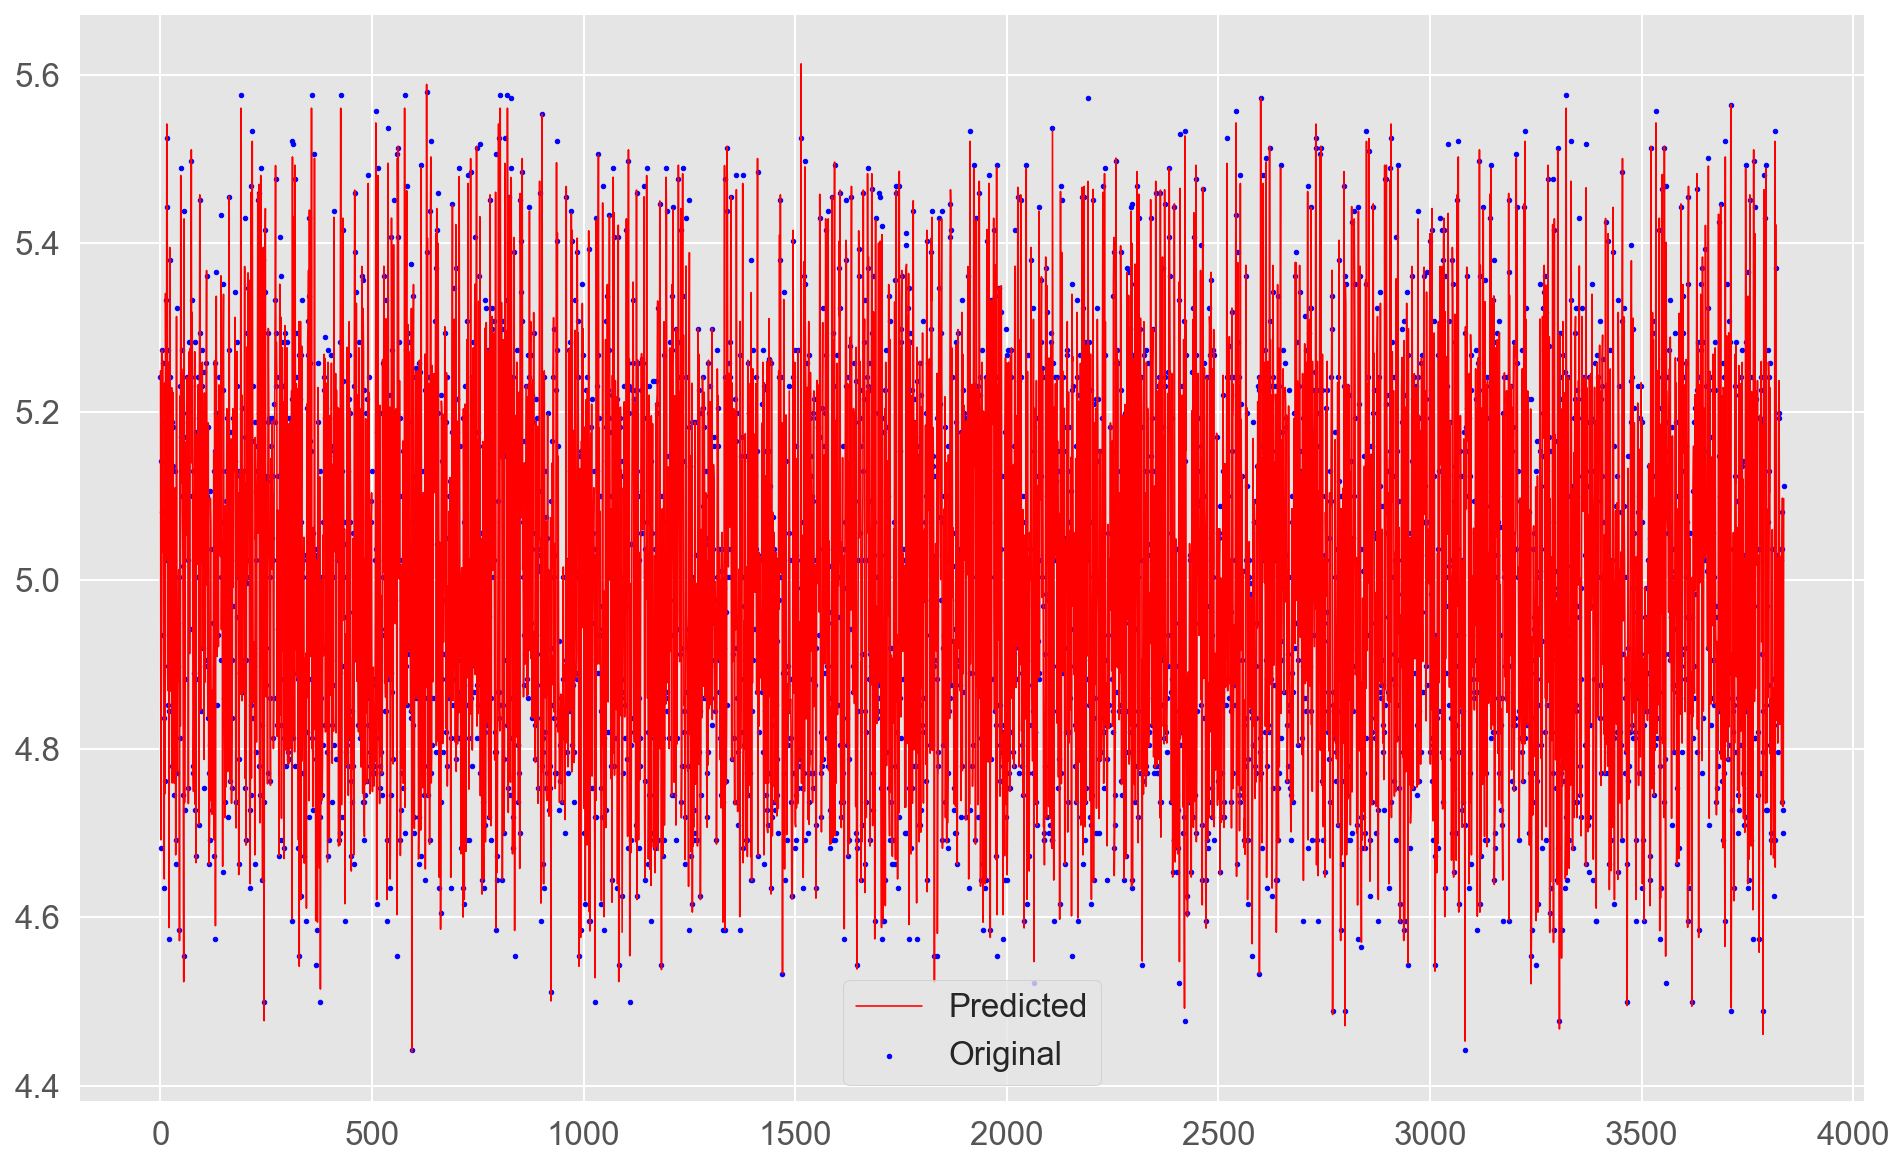

In [84]:
test_viz = range(len(X_test))
plt.scatter(test_viz , y_test, s=5, color="blue", label="Original")
plt.plot(test_viz , y_test_pred, lw=0.8, color="red", label="Predicted")
plt.legend()
plt.show()

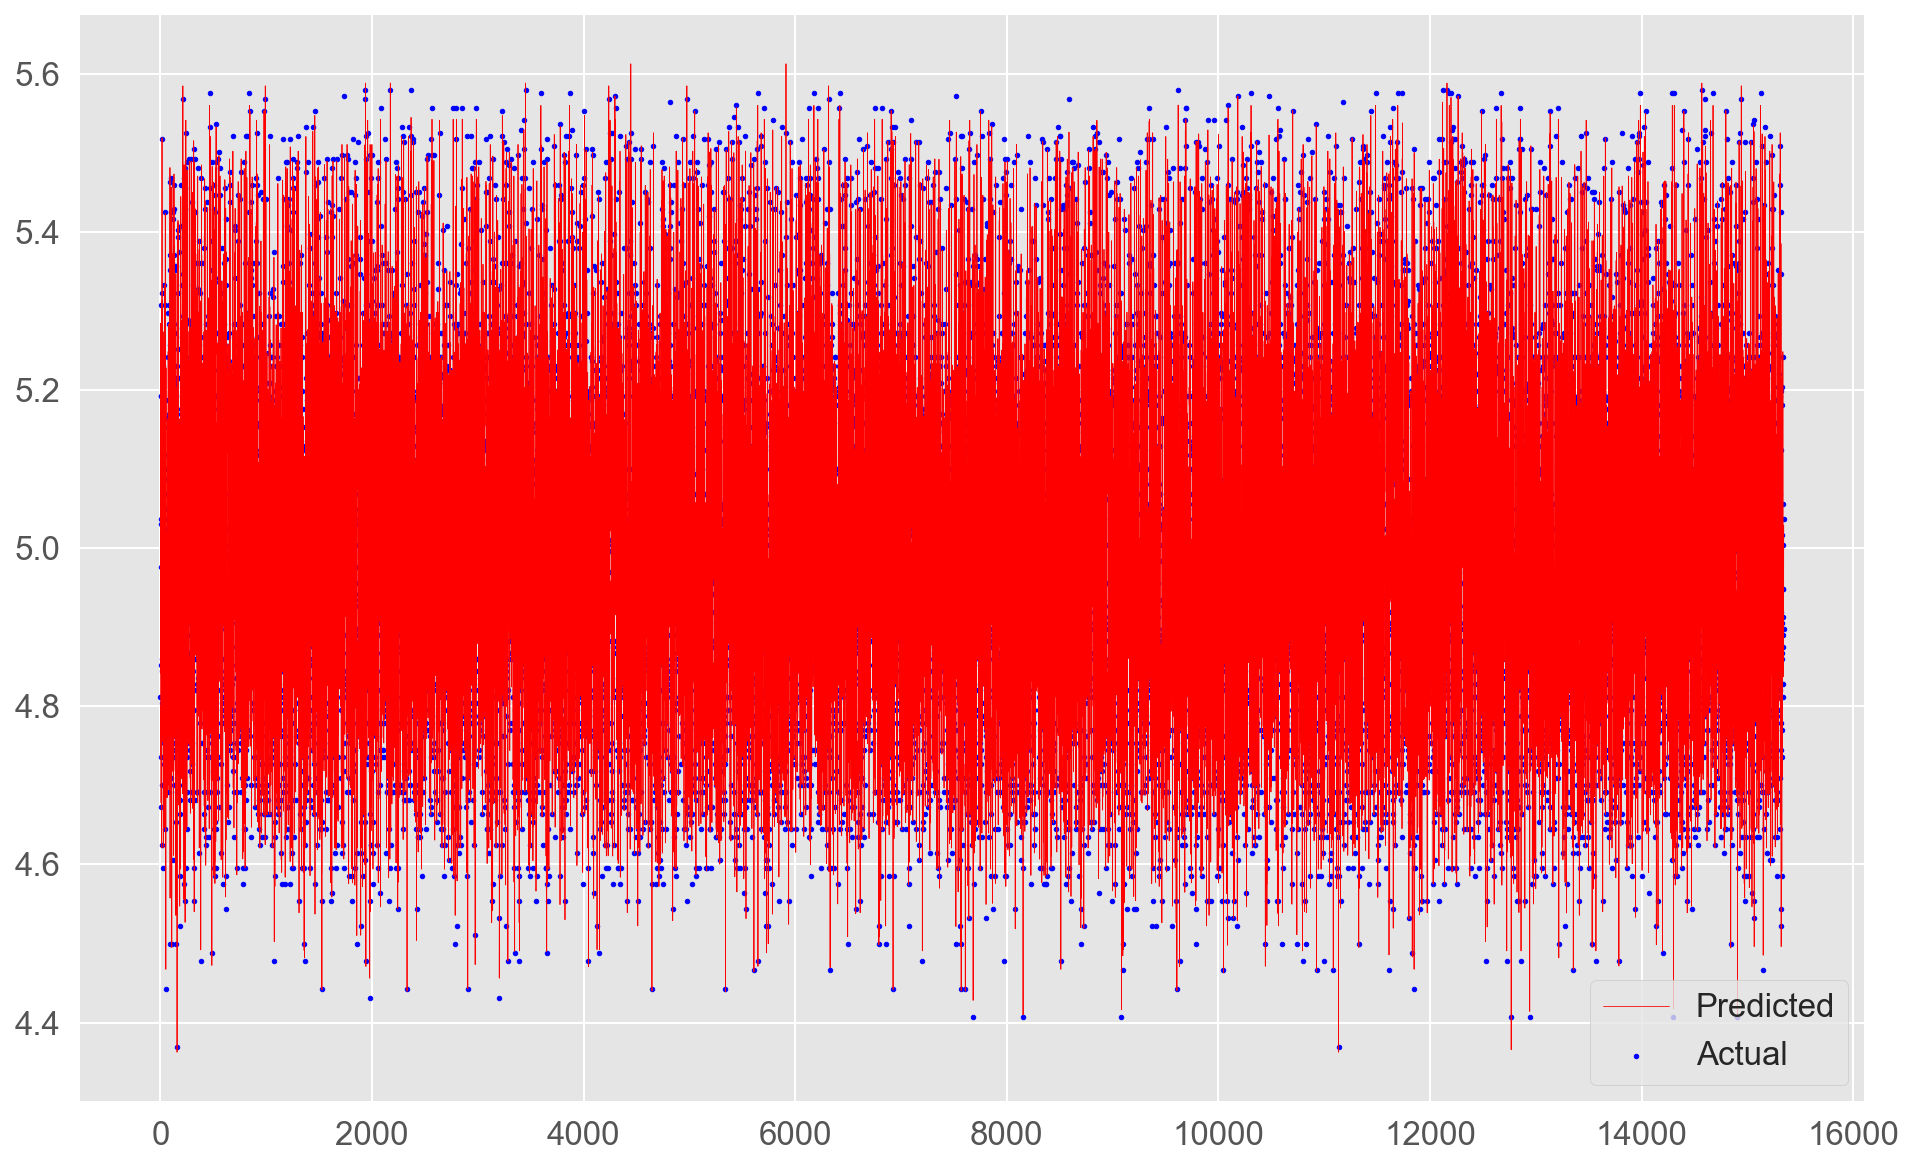

In [85]:
train_viz  = range(len(X_train))
plt.scatter(train_viz, y_train, s=5, color="blue", label="Actual")
plt.plot(train_viz, y_train_pred, lw=0.4, color="red", label="Predicted")
plt.legend()
plt.show()

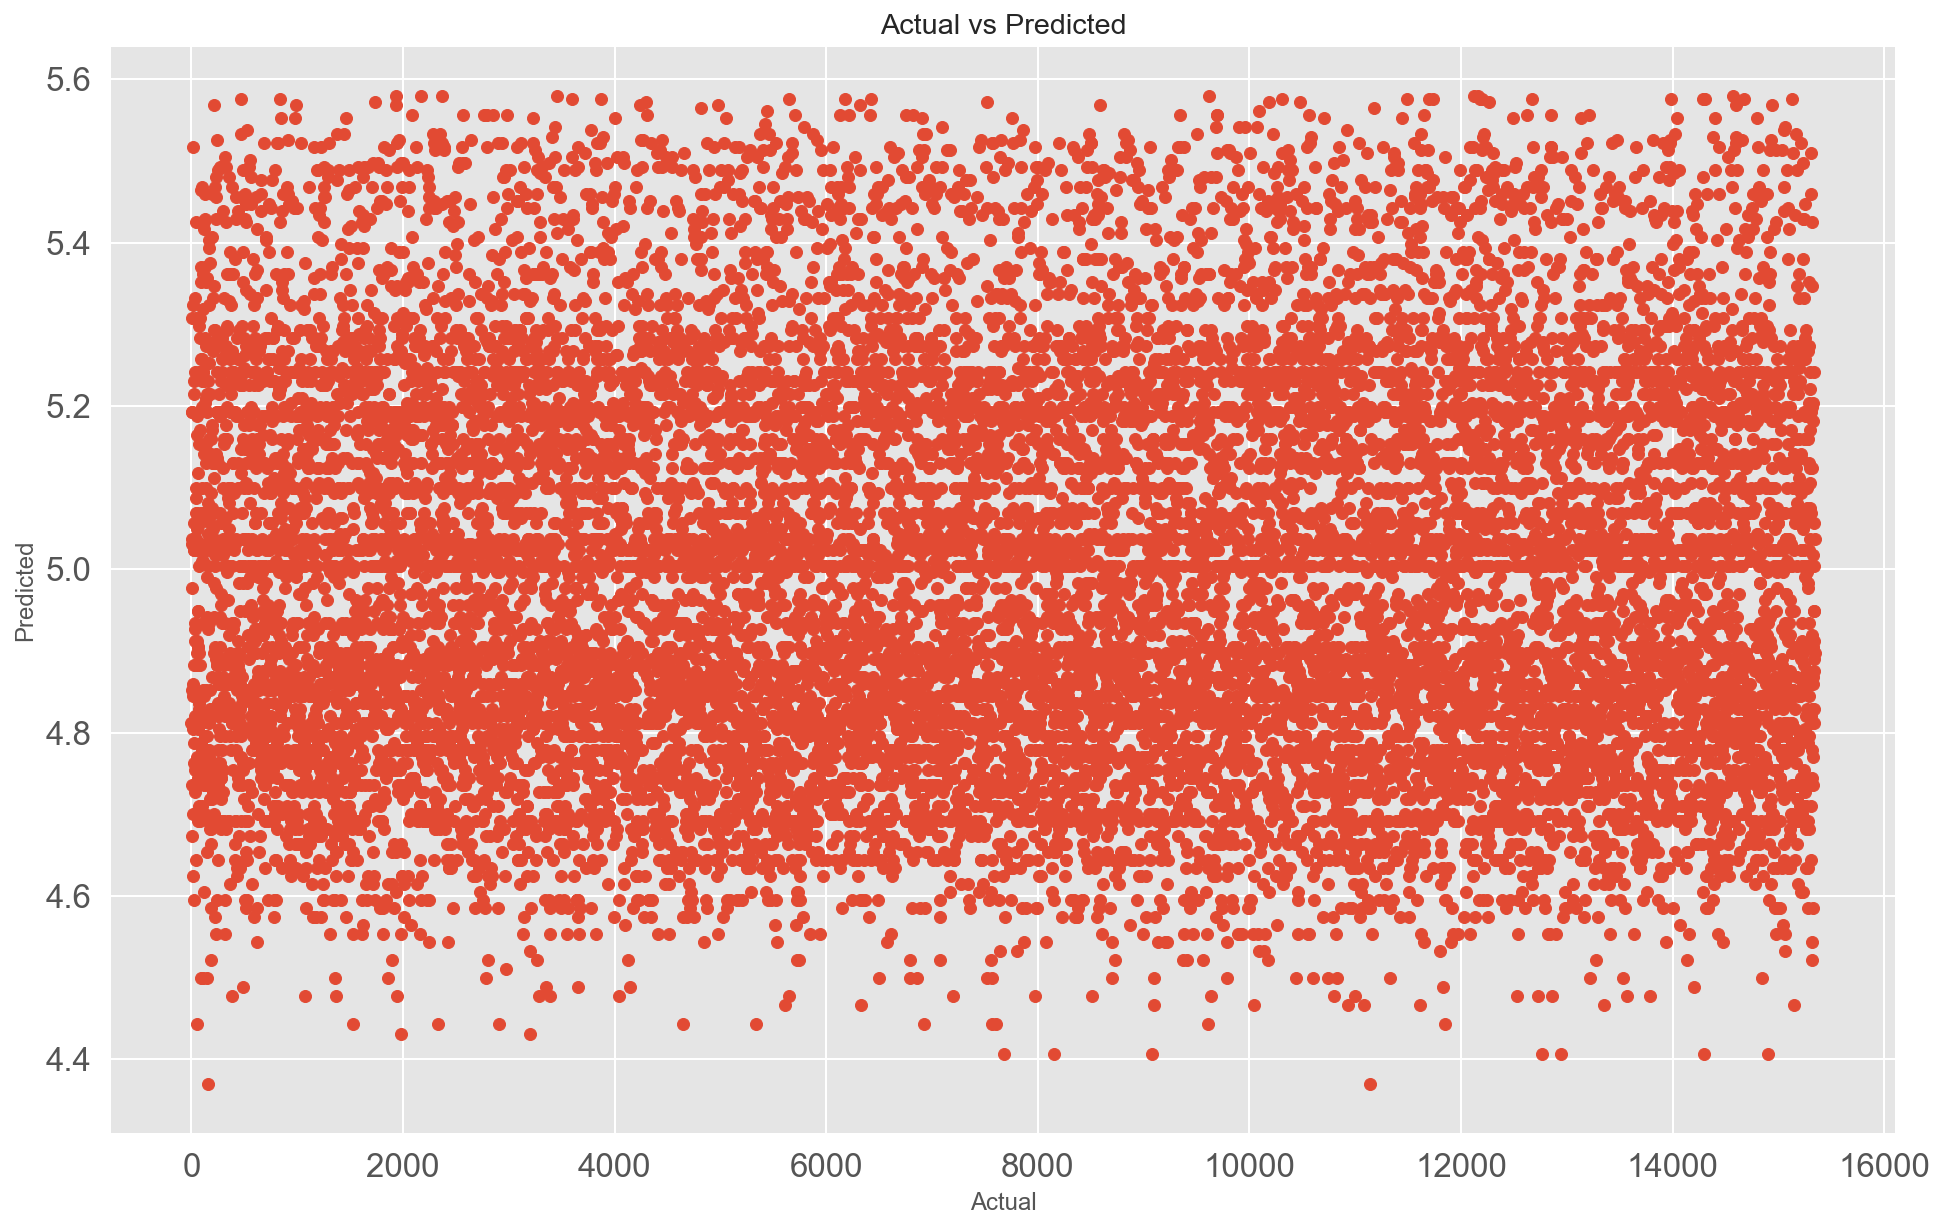

None

In [86]:
plt.figure()
train_viz  = range(len(X_train))
plt.scatter(train_viz, y_train)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
display(plt.show())

# (b).  Lasso Regression

In [87]:
lasso = Lasso()

# Cross Validation
folds = 5

lassoCV_Model = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lassoCV_Model.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [88]:
cv_results = pd.DataFrame(lassoCV_Model.cv_results_)

In [89]:
# Finding the R-squared value of Lasso Model
lassoCV_Model = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# Fitting the Model
lassoCV_Model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.5s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [90]:
cv_results1 = pd.DataFrame(lassoCV_Model.cv_results_)

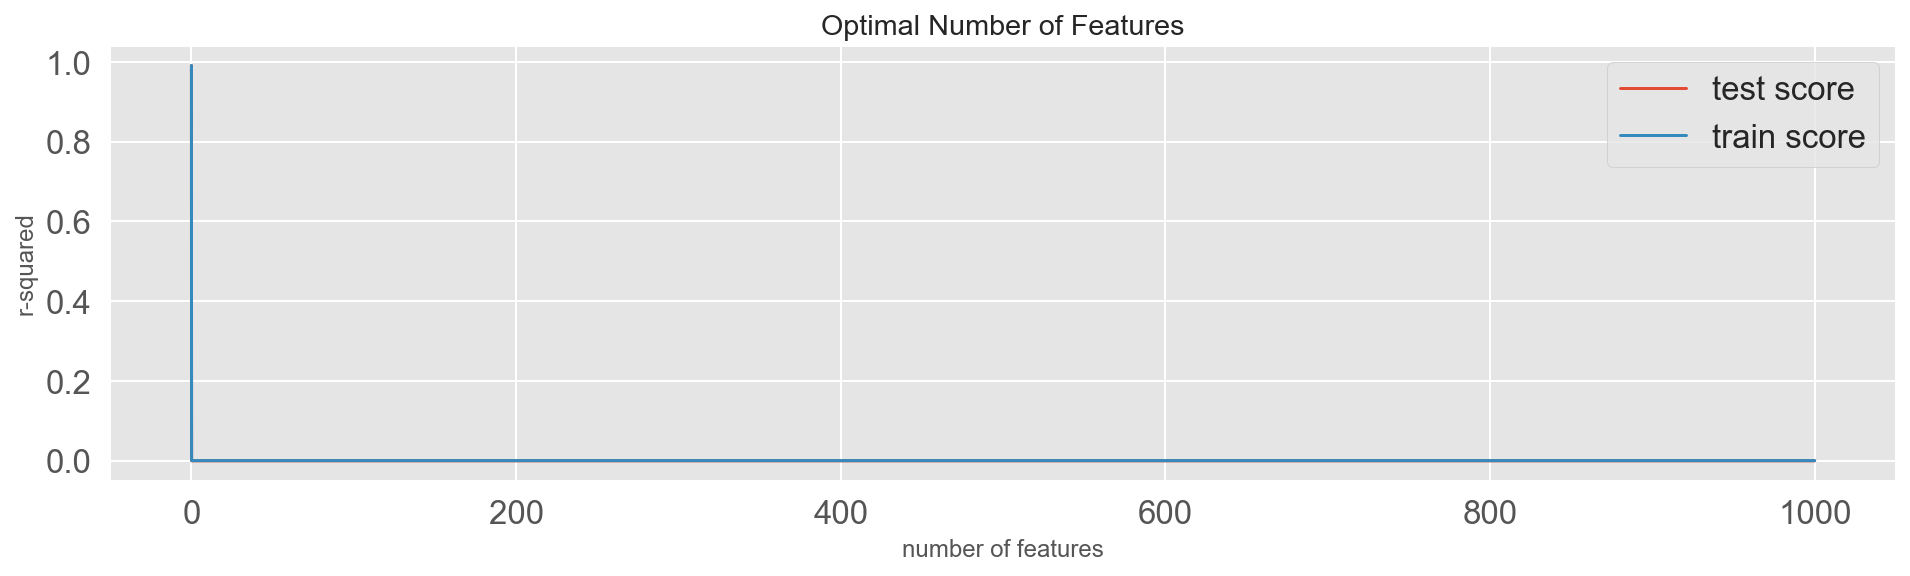

In [91]:
# Plotting CV Results
plt.figure(figsize=(16,4))
plt.plot(cv_results1["param_alpha"], cv_results1["mean_test_score"])
plt.plot(cv_results1["param_alpha"], cv_results1["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [92]:
# Checking the Value of Optimum Number of Parameters
print(lassoCV_Model.best_params_)
print(lassoCV_Model.best_score_)

{'alpha': 0.0001}
0.991113353611922


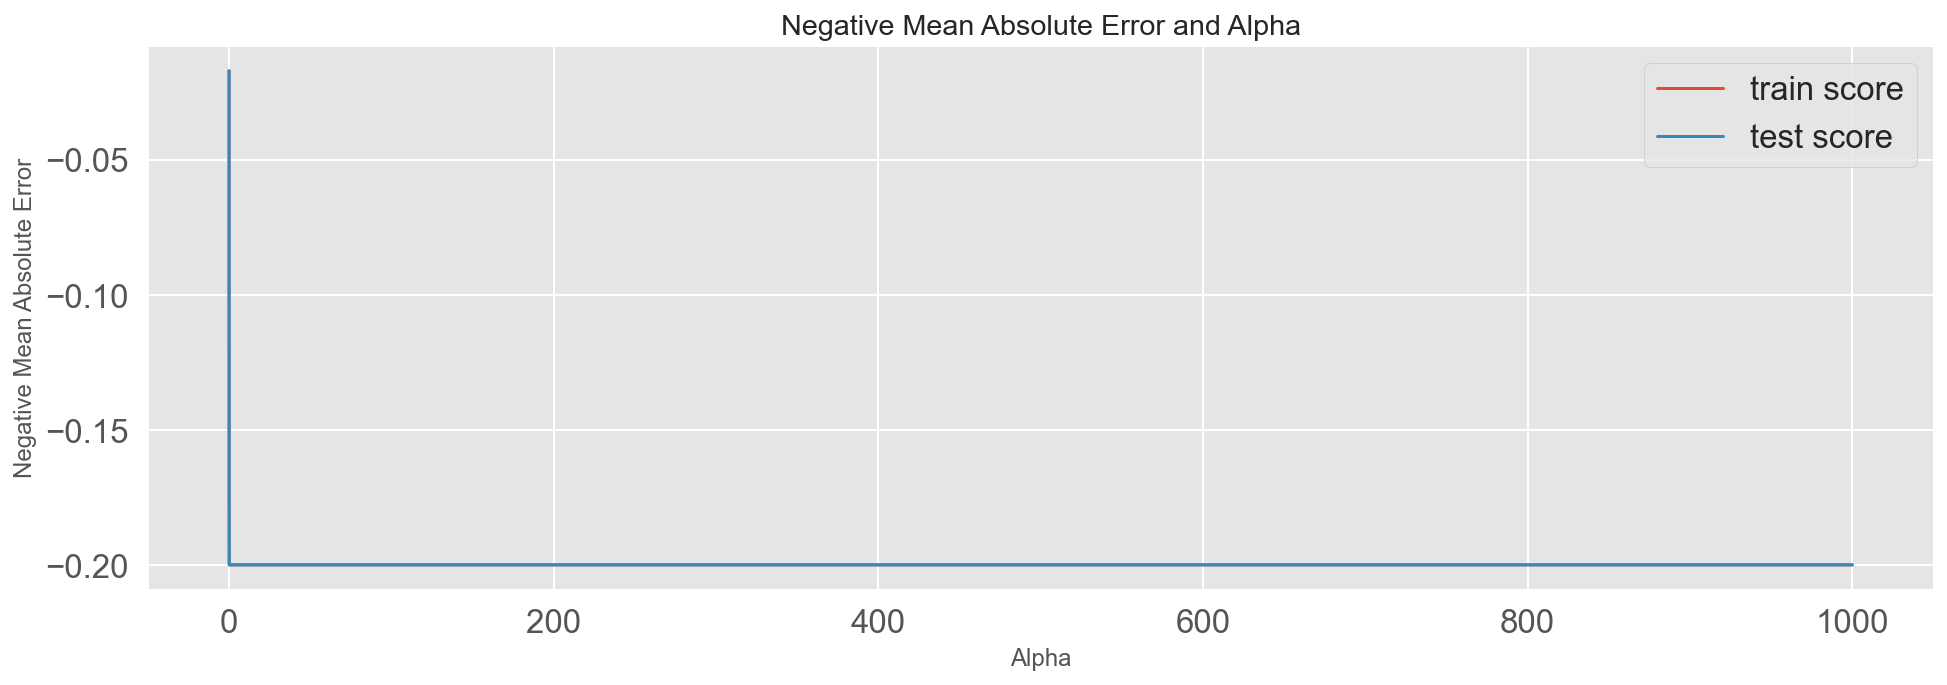

In [93]:
# Plotting Mean Test and Train Scores with Alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# Plotting
plt.figure(figsize=(16,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [94]:
# Setting the Alpha value to 0.0001 as shown from the bestparam

alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

### Lasso Regression Coefficient Estimates

In [95]:
LS_Coeff = pd.DataFrame() 
LS_Coeff["Columns"] = X_train.columns 
LS_Coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 
  
print(LS_Coeff)

        Columns  Coefficient Estimate
0        Max_HP              0.000580
1  Hway_Mileage              0.181557
2   Mix_Mileage              0.733204
3          CO_1              0.000000
4           NOC              0.032073
5         HCNOX             -0.032924
6          PTCL              0.000658
7      Max_Wght              0.083888
8       Gas_ES               0.000000
9       Gas_GO               0.000000


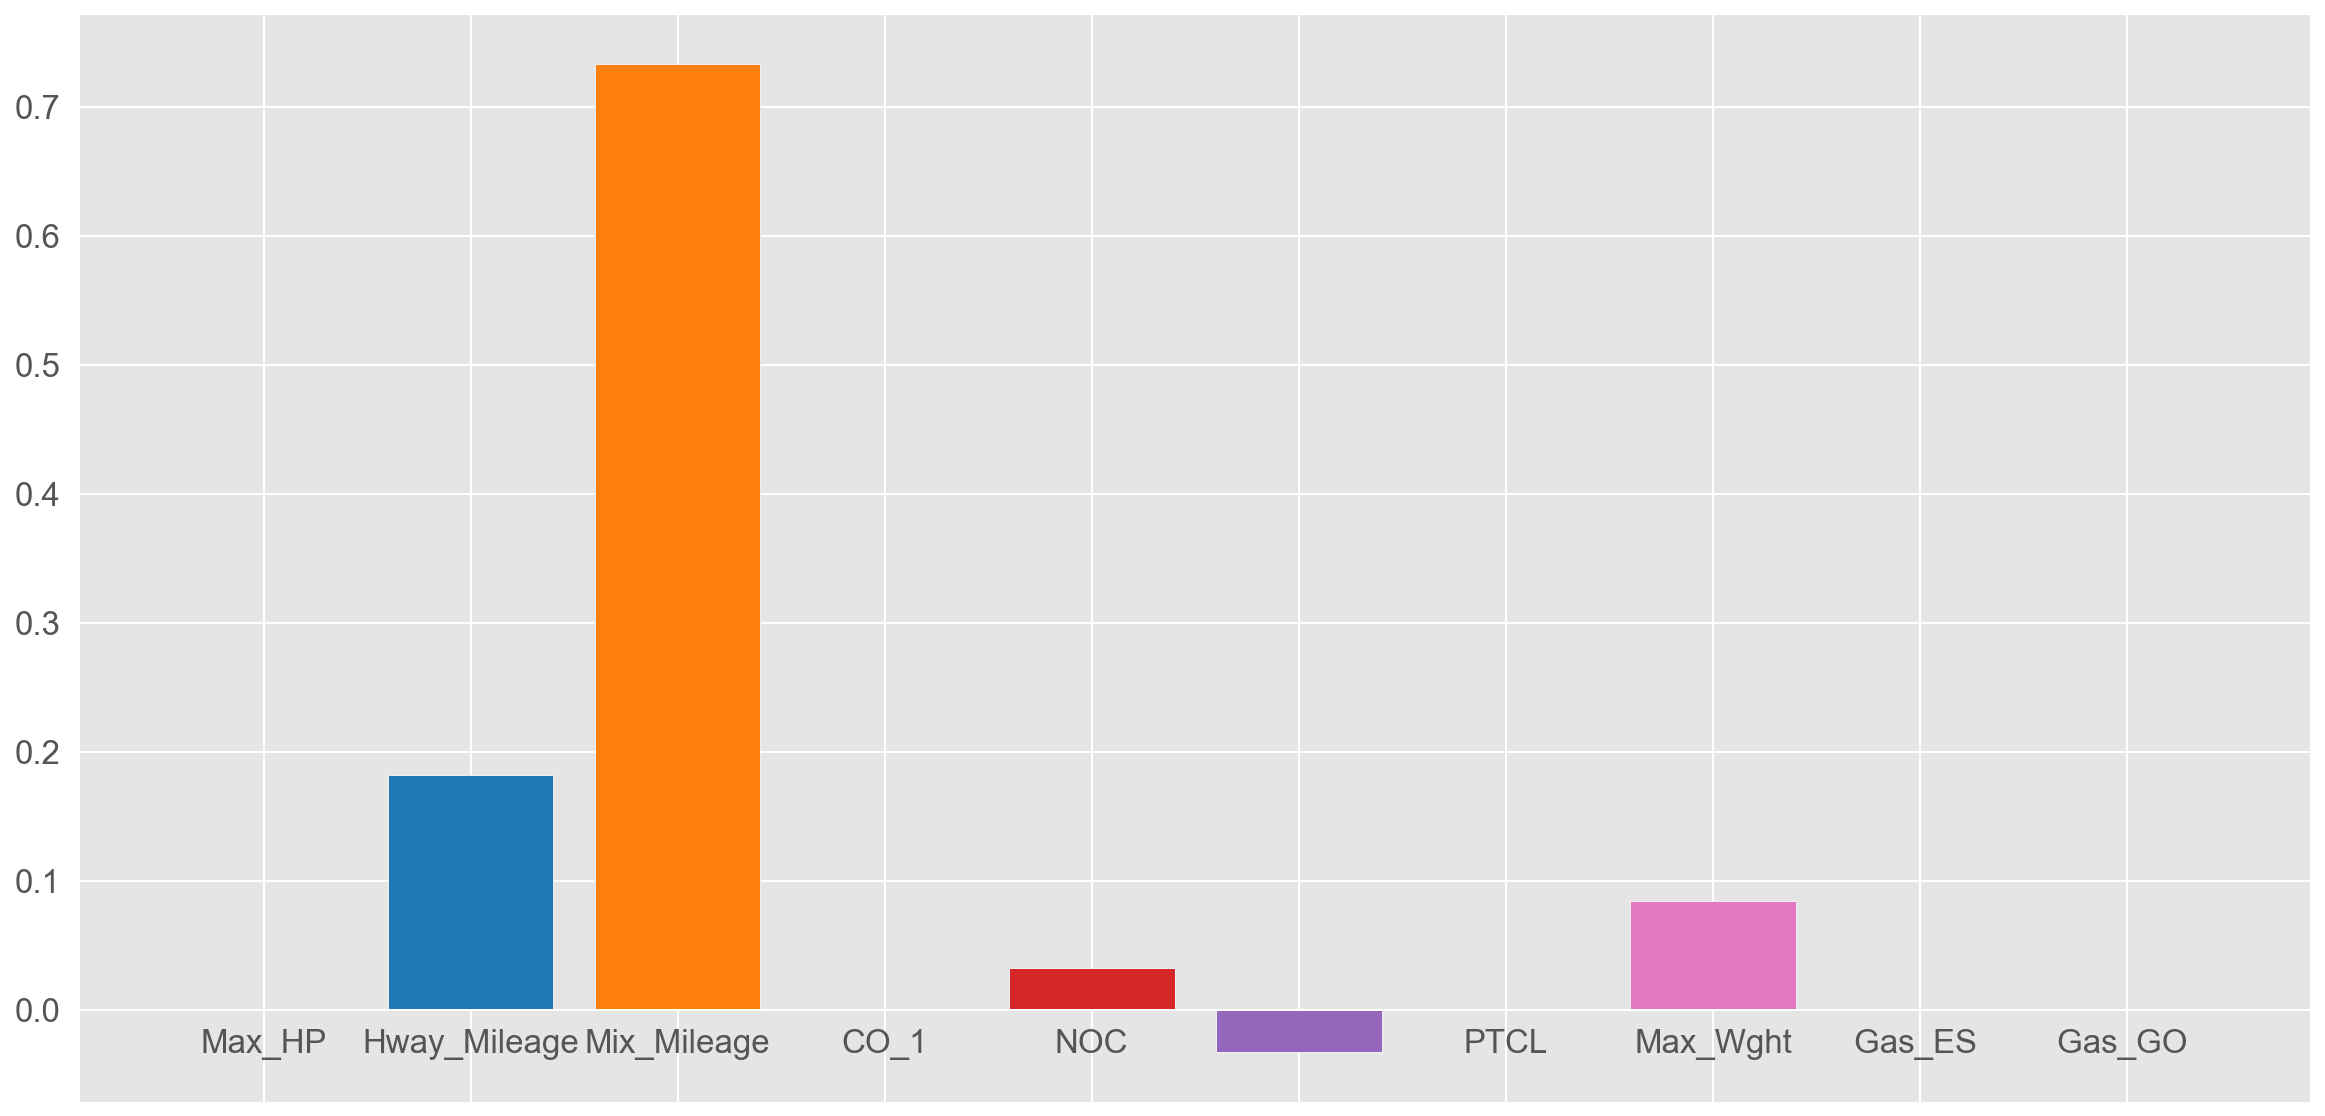

In [96]:
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['tab:gray', 'tab:blue', 'tab:orange',  
'tab:green', 'tab:red', 'tab:purple', 'tab:brown',  
'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',  
'tab:orange', 'tab:green', 'tab:blue', 'tab:olive'] 
  
ax.bar(LS_Coeff["Columns"],  
LS_Coeff['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 

### Lasso Regression Model Evaluation

### Train Data Evaluation

In [97]:
y_train_pred = lasso.predict(X_train)

Train R-Squared Value

In [98]:
print('Train R2:',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

Train R2: 0.9911351737658851


Train Mean Squared Error

In [99]:
MSE_Lasso = np.mean((y_train_pred - y_train)**2) 
print('Train MSE:',MSE_Lasso)

Train MSE: 0.0005011504477544338


Train Root Mean Square Error

In [100]:
train_error_lasso = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
print('Train RMSE:', train_error_lasso)

Train RMSE: 0.022386389788316197


### Test Data Evaluation

In [101]:
y_test_pred = lasso.predict(X_test)

Test R-Squared Value

In [102]:
y_test_pred = lasso.predict(X_test)
print('Test R2:',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

Test R2: 0.9907388097179438


Test Root Mean Square Error

In [103]:
test_error_lasso = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Test RMSE:', test_error_lasso)

Test RMSE: 0.022680944472047403


Test Root Mean Squared Error

In [104]:
test_error_lasso = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Test RMSE:', test_error_lasso)

Test RMSE: 0.022680944472047403


### Test and Train Lasso Model Prediction Visualization

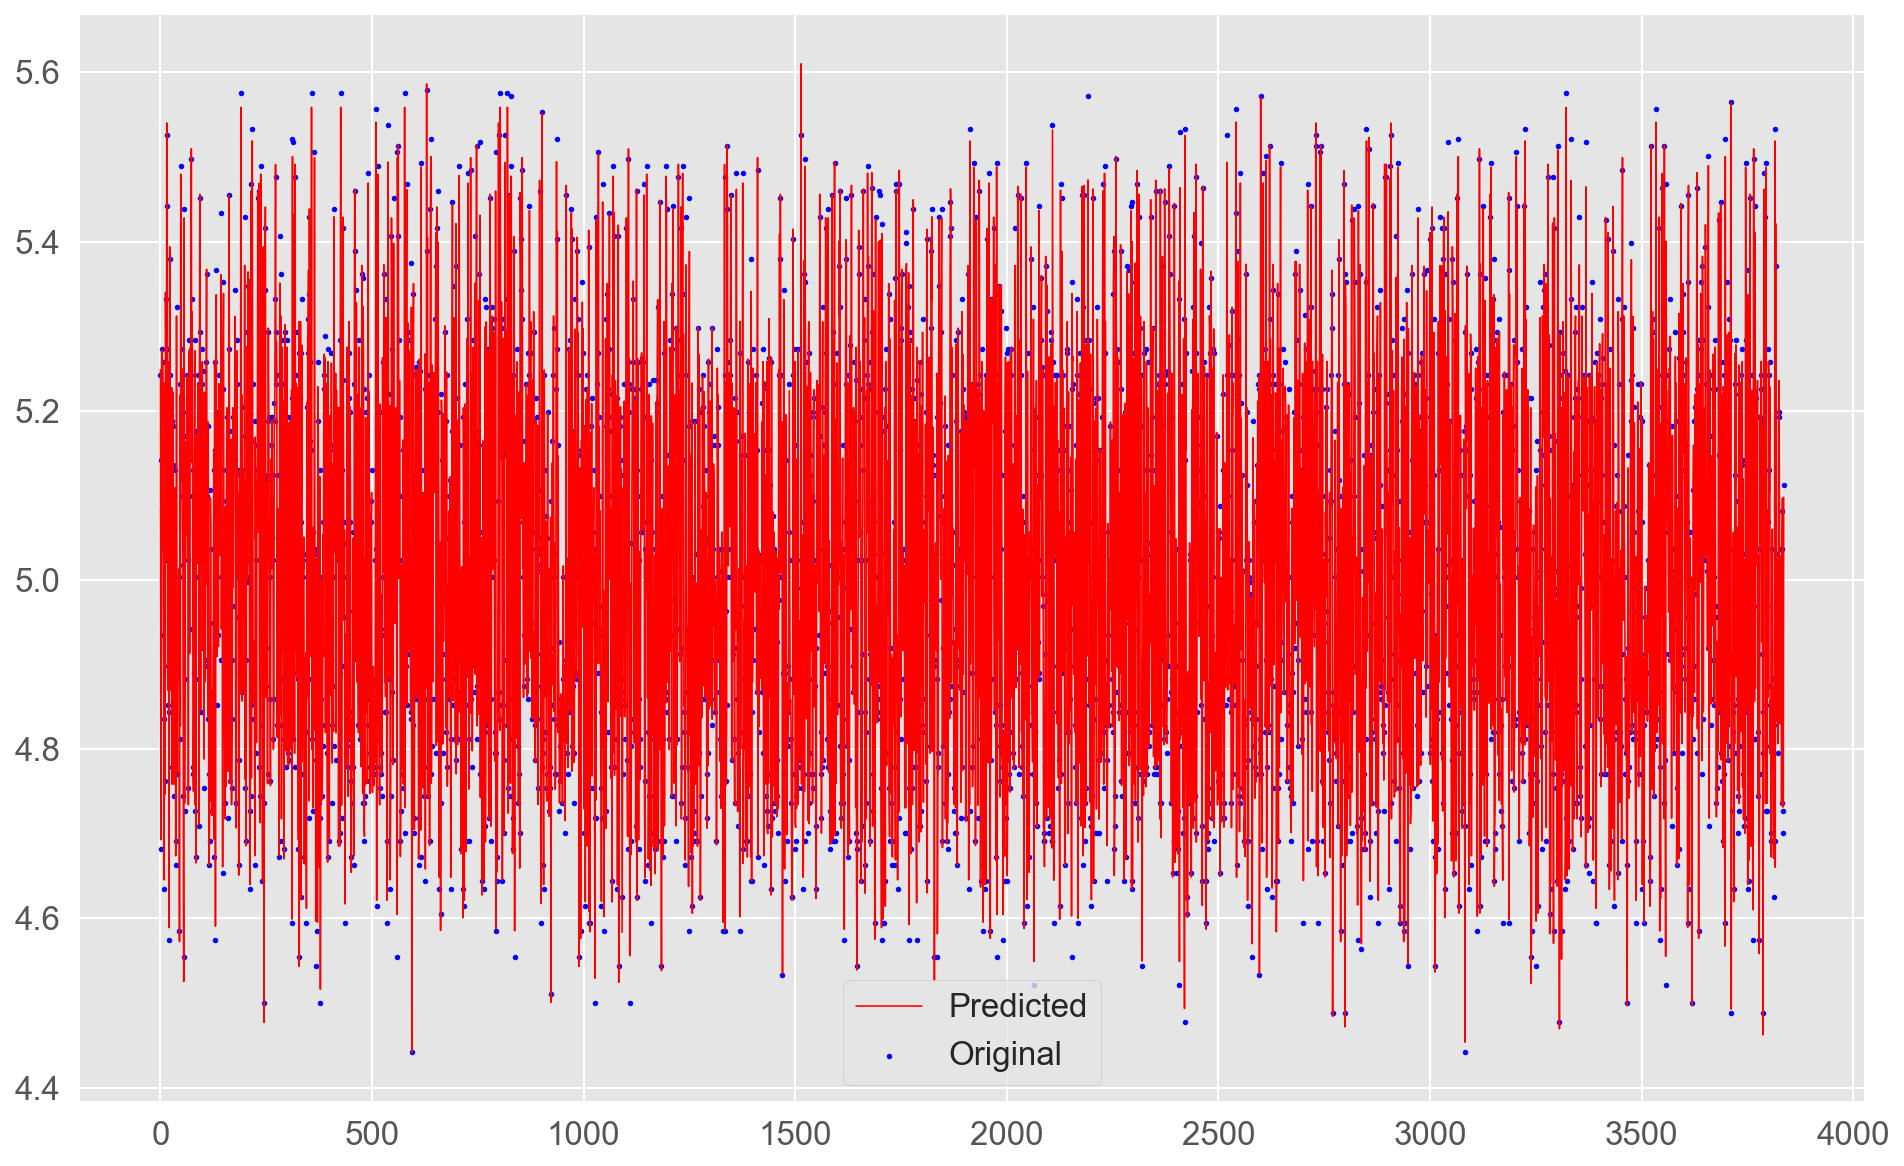

In [105]:
test_viz = range(len(X_test))
plt.scatter(test_viz, y_test, s=5, color="blue", label="Original")
plt.plot(test_viz, y_test_pred, lw=0.8, color="red", label="Predicted")
plt.legend()
plt.show()

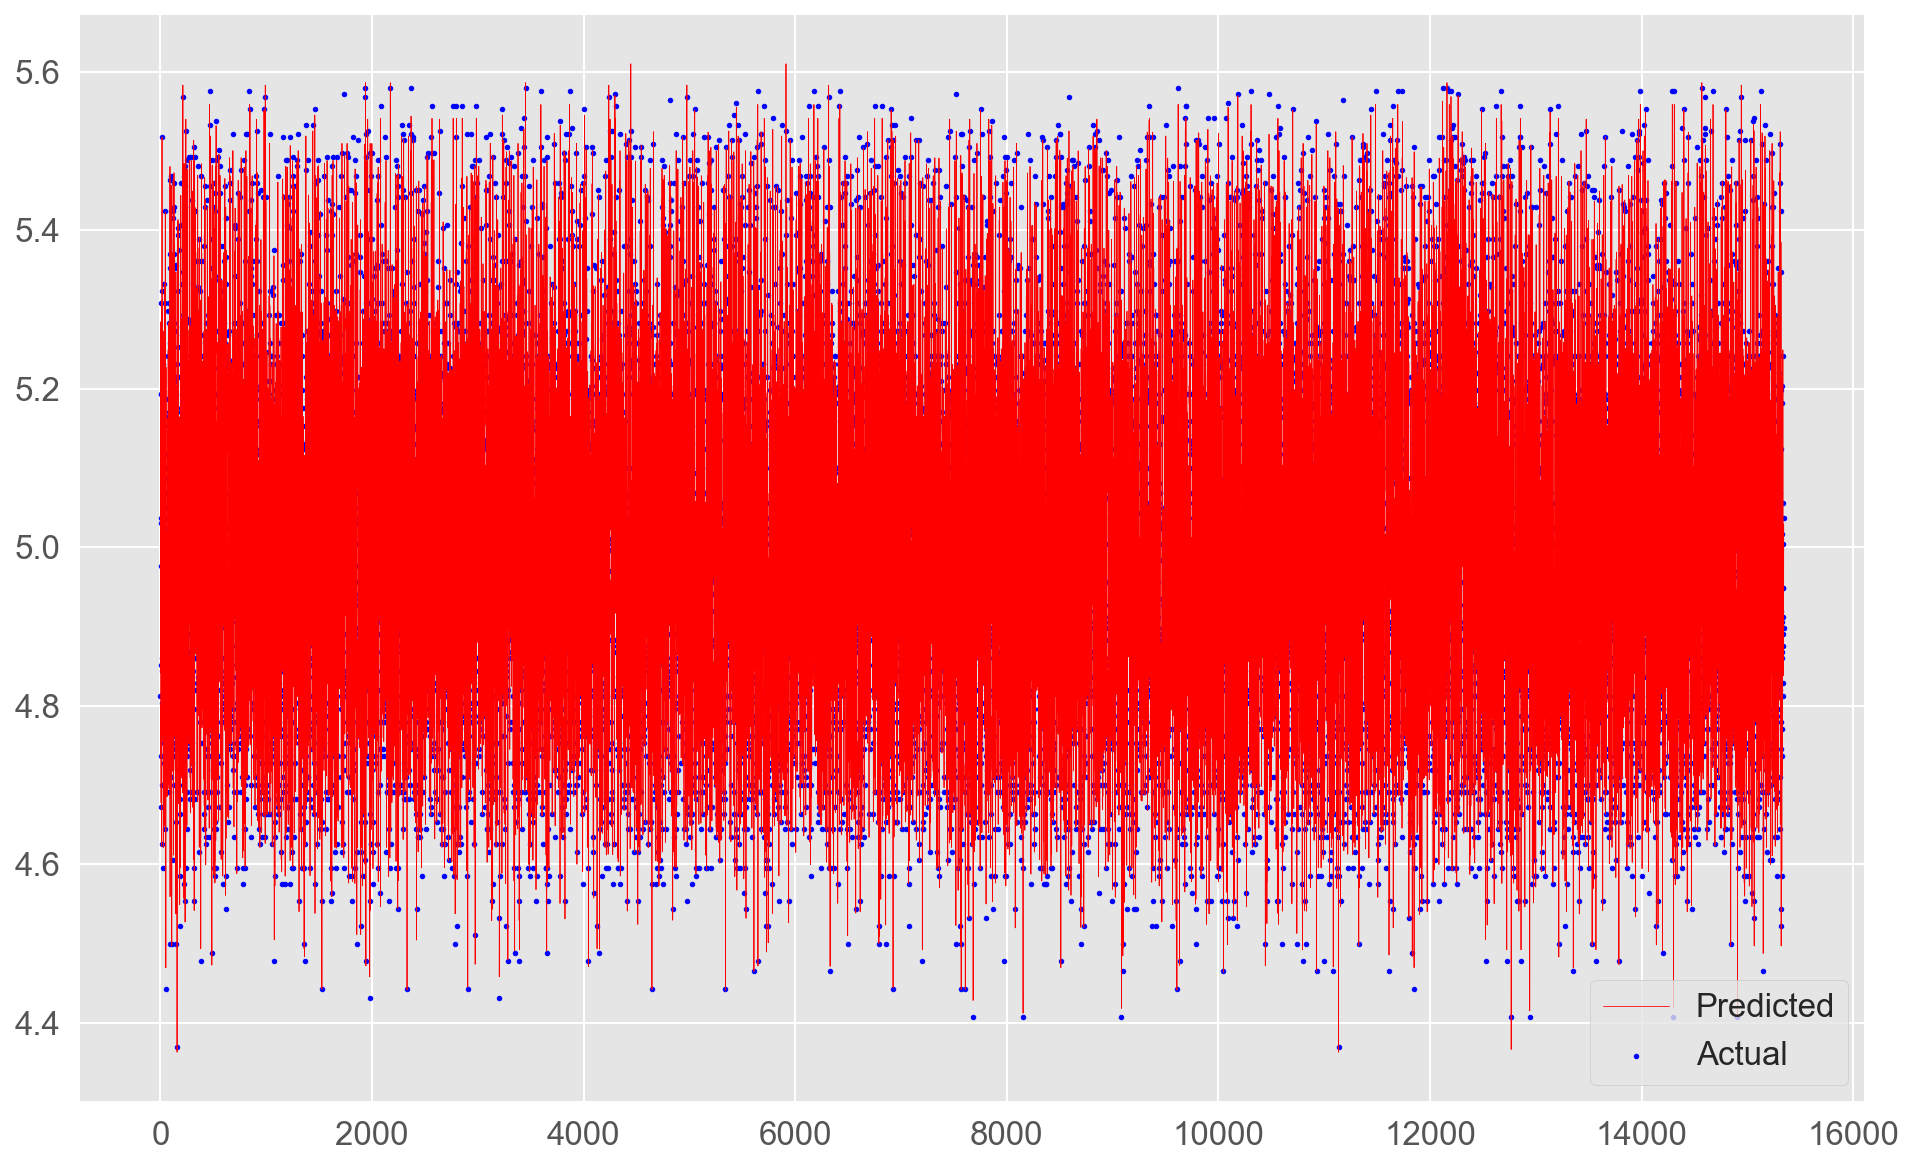

In [106]:
train_viz  = range(len(X_train))
plt.scatter(train_viz, y_train, s=5, color="blue", label="Actual")
plt.plot(train_viz, y_train_pred, lw=0.4, color="red", label="Predicted")
plt.legend()
plt.show()

# Linear Regression Highway CO2 Model Comparison

In [108]:
from pandas import DataFrame,Series


test_error=[test_error_elastic, test_error_ridge, test_error_lasso]

train_error=[train_error_elastic, train_error_ridge, train_error_lasso]

col={'Test RMSE':test_error,'Train RMSE':train_error}

models=['ElasticNet','Ridge','Lasso']
LR_Comp=DataFrame(data=col,index=models)

LR_Comp

Test RMSE  Train RMSE
ElasticNet   0.022674    0.022388
Ridge        0.022685    0.022373
Lasso        0.022681    0.022386

<AxesSubplot:>

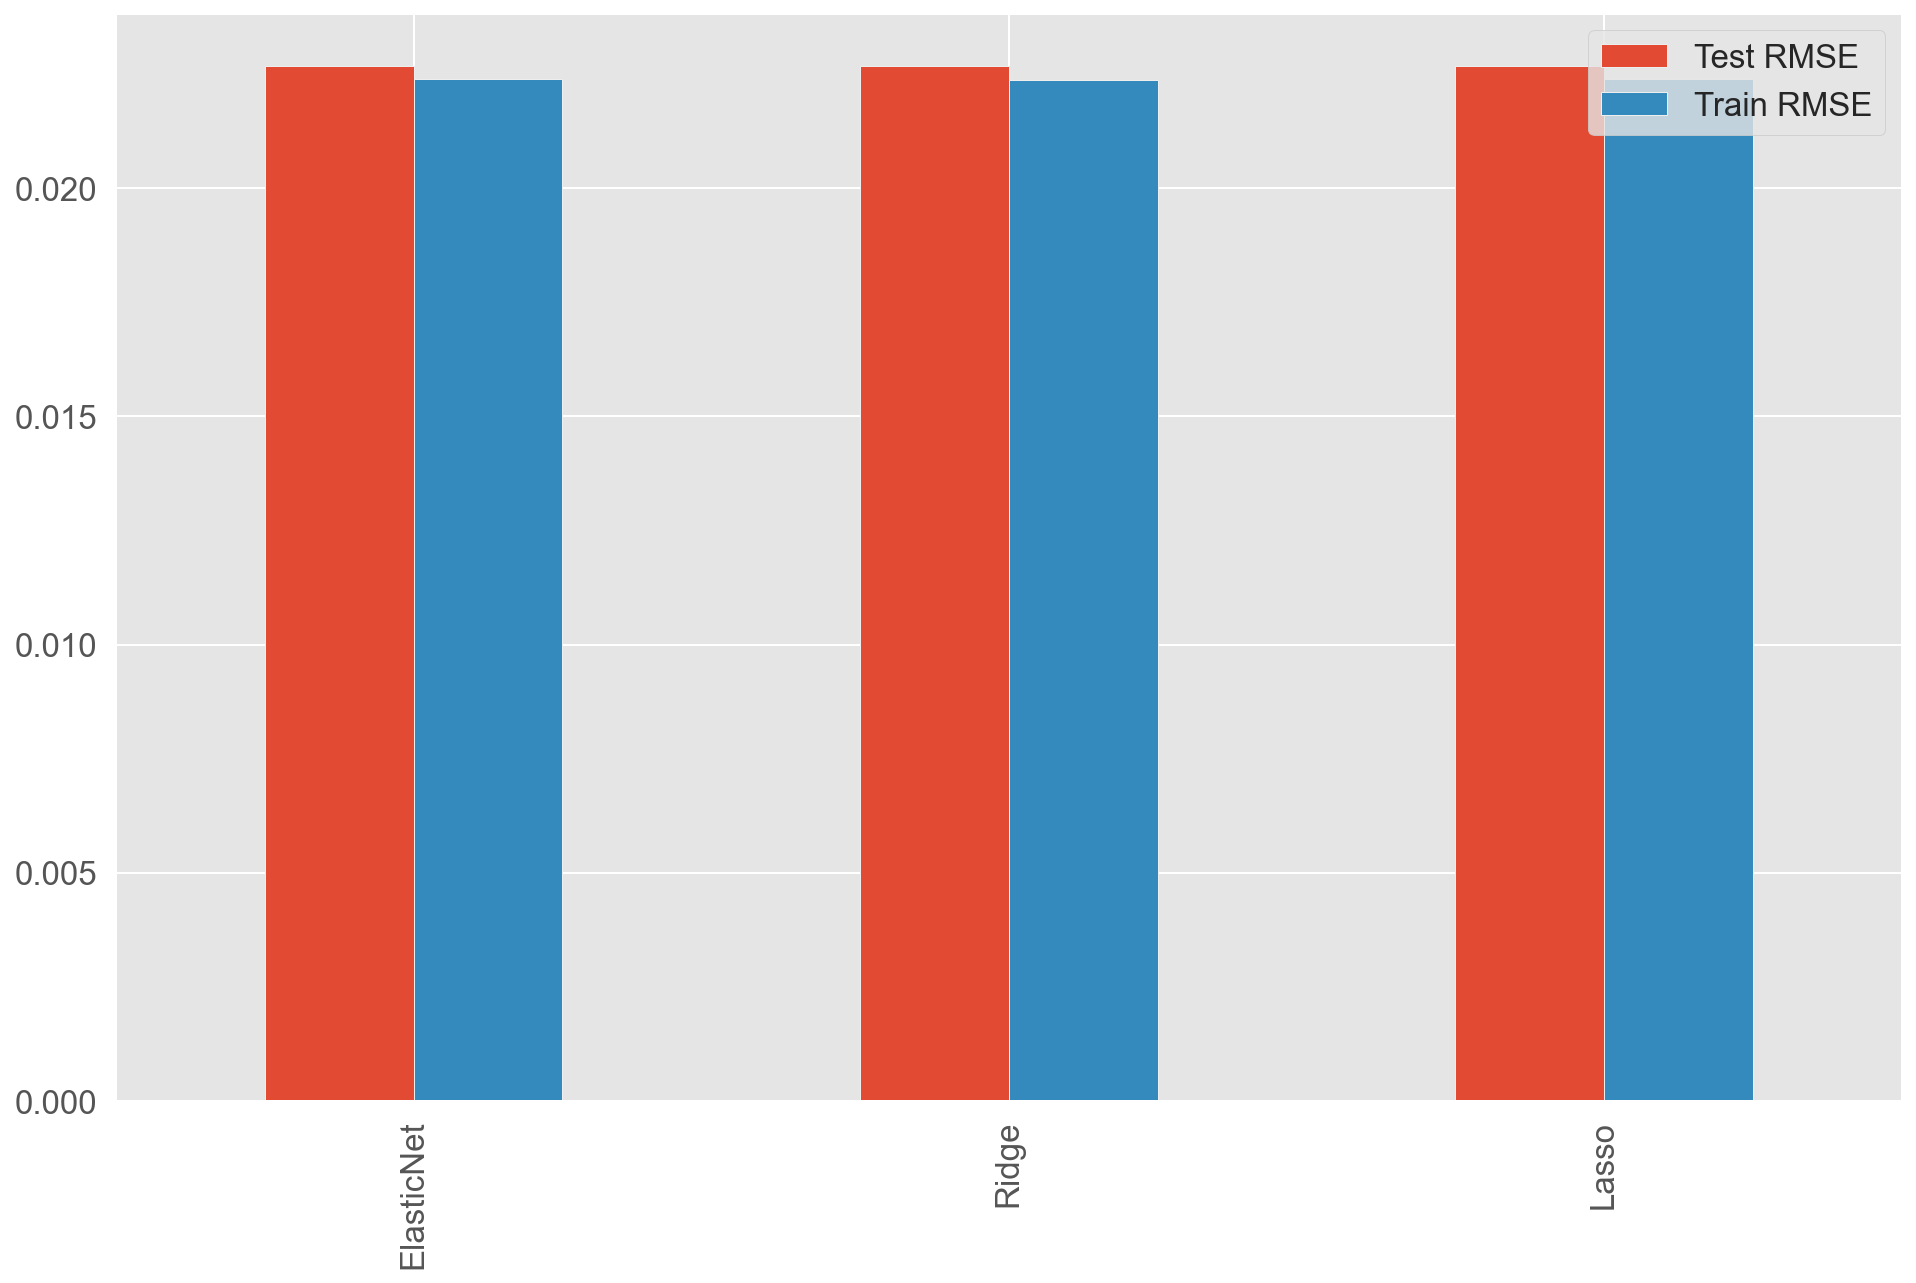

In [109]:
LR_Comp.plot(kind='bar')


# CONCLUSION
+ Least performing set of models, no need to carry out predictions with any LR models.